Project setelah UTS

# Klasifikasi Firewall

Nama : Dina Violina

NIM : 210411100004

Kelas : Proyek Sains Data (B)

## 1. Business Understanding

Tujuan :

Untuk melakukan klasifikasi prediksi jaringan data yang dikirim dari jaringan komputer, outputnya 4 yaitu allow" yang berarti diizinkan, "deny" berarti ditolak, "drop" berarti dibuang, "reset-both" berati setel ulang. Sehingga hasil dari klasifikasi ini akan mengidentifikasi prediksi sebuah jaringan firewall tersebut memiliki reaksi action apa.

Untuk menentukan prediksi firewall harus mengetahui ciri-ciri sebagai berikut :
- Source Port
- Destination Port
- NAT source port
- Bytes
- Bytes sent 
- Bytes Received
- Packets
- Elapsed Time (sec)
- pkts_sent 
- pkts_received 

## 2. Data Understanding

Dataset berupa kumpulan data log jaringan yang dikumpulkan oleh organisasi swasta. Log lalu lintas jaringan dikumpulkan dari tanggal 18 hingga 27 Mei 2021. catatan log yang digunakan diambil dari firewall yang digunakan oleh organisasi. Internet  diakses  oleh  banyak  orang  tanpa terkecuali  hacker  dan  cracker.  Dengan  alasan  tertentu  mereka  melakukan  penyusupan  yang  dapat  merugikan para pemilik server dan jaringan komputer. Salah satu tools  yang dapat  digunakan untuk  melakukan tindakan preventif  terhadap  serangan  jaringan  komputer  dengan  menggunakan  firewall.
Firewall adalah sistem keamanan jaringan yang membatasi akses yang tidak sah ke jaringan dan melindungi sistem dan data dari seragan eksternal. Tujuan firewall menciptakan keamanan koneksi antara jaringan pribadi dan jaringan internet.

. 
### Mengidentifikasi jumlah data
Mengidentifikasi jumlah data merupakan langkah awal untuk memahami skala dataset yang akan kita lakukan pengolahan. Dengan mengetahui jumlah baris (observasi) dan kolom (fitur) atau gambaran umum tentang ukuran data. Jumlah dataset sebanyak 65532 dengan rincian sebagai berikut :
Pada fitur atau kolom Action terdapat 4 output sebagai berikut :
- allow         37640
- deny          14987
- drop          12851
- reset-both       54



import modul yang akan digunakan

In [6]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [7]:
# variabel data digunakan untuk menyimpan data yang dipanggil menggunakan library pandas.
data = pd.read_csv('firewall.csv')

In [8]:
data

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,drop,70,70,0,1,0,1,0
65530,54870,445,0,0,drop,70,70,0,1,0,1,0


In [9]:
jumlah_data = data.shape[0]
print("Jumlah Data Firewall :", jumlah_data)

Jumlah Data Firewall : 65532


Identifikasi setiap target kelas didapatkam Allow menjadi kelas yang paling dominan karena hasilnya lebih tinggi dan memiliki jarak perbedaan yang jauh pada target kelas lainnya. Sehingga, pada data ini jika langsung dilakukan pengolahan klasifikasi akan mendapatkan hasil yang tidak sesuai atau terjadi kesalahan prediksi. Untuk menangani hal seperti ini perlu dilakukan balancing data untuk memberikan keseimbangan nilai yang dihasilkan. 

In [10]:
action_counts = data['Action'].value_counts()
print("Sebaran kelas target pada kolom Action")
print(action_counts)

Sebaran kelas target pada kolom Action
allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64


### Deskripsi Fitur
Internet Firewall Data
Pada dataset ini terdapat 12 fitur dengan jumlah data sebanyak 65532.

 1. Source Port :Port sumber yang digunakan dalam koneksi jaringan. Port ini menunjukkan port yang digunaakan oleh komputer atau perangkat untuk mengirimkan paket data.

2. Destination Port : Port tujuan dalam koneksi jaringan. Port ini menunjukkan port yang dituju oleh komputer atau perangkat penerima untuk menerima paket data. 

3. NAT source port : Port sumber Network Address Trnslation (NAT) yang digunakan dalam koneksi jaringan. NAT adalah teknik yang digunakan untuk mengalihkan alamat IP atau port dalam paket data untuk menghubungkan beberapa perangkat ke internet dengan satu alamat IP. 

4. NAT destination port : Port tujuan NAT yang digunakan dalam koneksi jaringan. Ini adalah port tujuan setelah melalui proses NAT. 

5. Action : Kolom target yang akan diprediksi dalam pemodelan. Nilai-nilai di kolom ini menunjukkan tindakan yang diambil dalam koneksi jaringan, dengan target "allow" yang berarti diizinkan, "deny" berarti ditolak, "drop" berarti dibuang, "reset-both" berarti setel ulang.


6. Bytes : Jumlah total byte dalam koneksi jaringan. Hal ini mengukur besarnya data yang ditransmisikan dalam koneksi tersebut.

7. Bytes sent :Jumlah byte yang dikirim dalam koneksi jaringan. Kolom ini mengukur besarnya data yang dikirim dari sumber ke tujuan.

8. Bytes Received : Jumlah byte yang diterima dalam koneksi jaringan. Ini mengukur besarnya data yang diterima oleh penerima. 

9. Packets : Jumlah total paket data yang dikirim dalam koneksi jaringan. Paket adalah unit data yang dikirim dalam jaringan. 

10. Elapsed Time (sec) : Waktu yang dibutuhkan dalam koneksi jaringan, diukur dengan satuan detik. Kolom ini menunjukkan durasi dari koneksi. 

11. pkts_sent : Kolom yang berisi jumlah paket data yang dikirim dalam koneksi jaringan. 

12. pkts_received : Kolom yang berisi jumlah paket data yang diterima dalam koneksi jaringan. 

### Jenis-jenis data
Berdasarkan skala ukur  dapat dibedakan menjadi 4 jenis sebagai berikut :
1. Nominal

  Jenis data nominal yaitu data hanya mengandung unsur penamaan. Pada pengolahan data ini, jenis data nominal terdapat pada kolom Cation yang terdiri dari allow, denny, drop, dan reset-both tanpa urutan tertentu.
2. Ordinal

  Data ordinal adalah data yang memiliki tingkatan atau peringkat, namun jarak antara nilai-nilainya tidak terdefinisi secara jelas.
  Contoh : tingkat pendidikan SD, SMP,SMA, Sarjana, Magister, Doktor
3. Interval

  Data interval adalah data yang memiliki tingkatan atau peringkat dengan jarak antar nilai yang terdefinisi secara konsisten. Meskipun memiliki nol mutlak, tetapi nol tersebut tidak memiliki arti mutlak (mis. suhu di Celcius atau Fahrenheit).
  Contoh: Jika terdapat kolom Elapsed Time (sec) yang menyatakan waktu dalam detik.
4. Rasio

  Data rasio memiliki tingkatan atau peringkat dengan jarak antar nilai yang terdefinisi secara konsisten dan memiliki nol mutlak yang memiliki arti mutlak. Data rasio memungkinkan operasi matematika seperti penambahan, pengurangan, perkalian, dan pembagian.
  Contoh : Kolom yang memiliki jenis data rasio pada data firewall ini adalah kolom Bytes, Bytes Sent, Bytes Received, Packets, dan pkts_sent.


In [11]:
# jumlah fitur dari data
data.shape

(65532, 12)

In [12]:
# nama-nama fitur pada data
data.columns

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Action', 'Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received'],
      dtype='object')

Mengetahui tipe data dari masing-masing kolom atau fitur.

In [13]:
data.dtypes

Source Port              int64
Destination Port         int64
NAT Source Port          int64
NAT Destination Port     int64
Action                  object
Bytes                    int64
Bytes Sent               int64
Bytes Received           int64
Packets                  int64
Elapsed Time (sec)       int64
pkts_sent                int64
pkts_received            int64
dtype: object


### Eksplorasi Data Awal
Eksplorasi data awal merupakan langkah penting dalam memahami karakteristik dataset. Salah satu cara untuk melakukan eksplorasi data adalah dengan melakukan penggrafikan fitur (feature visualization)atau visualisasi ciri-ciri atau fitur dari dataset dengan grafik. Pada eksplorasi data firewall ini menggunakan visualisasi data menggunakan grafik batang, scatter plot, line plot, dan diagram lingkaran.

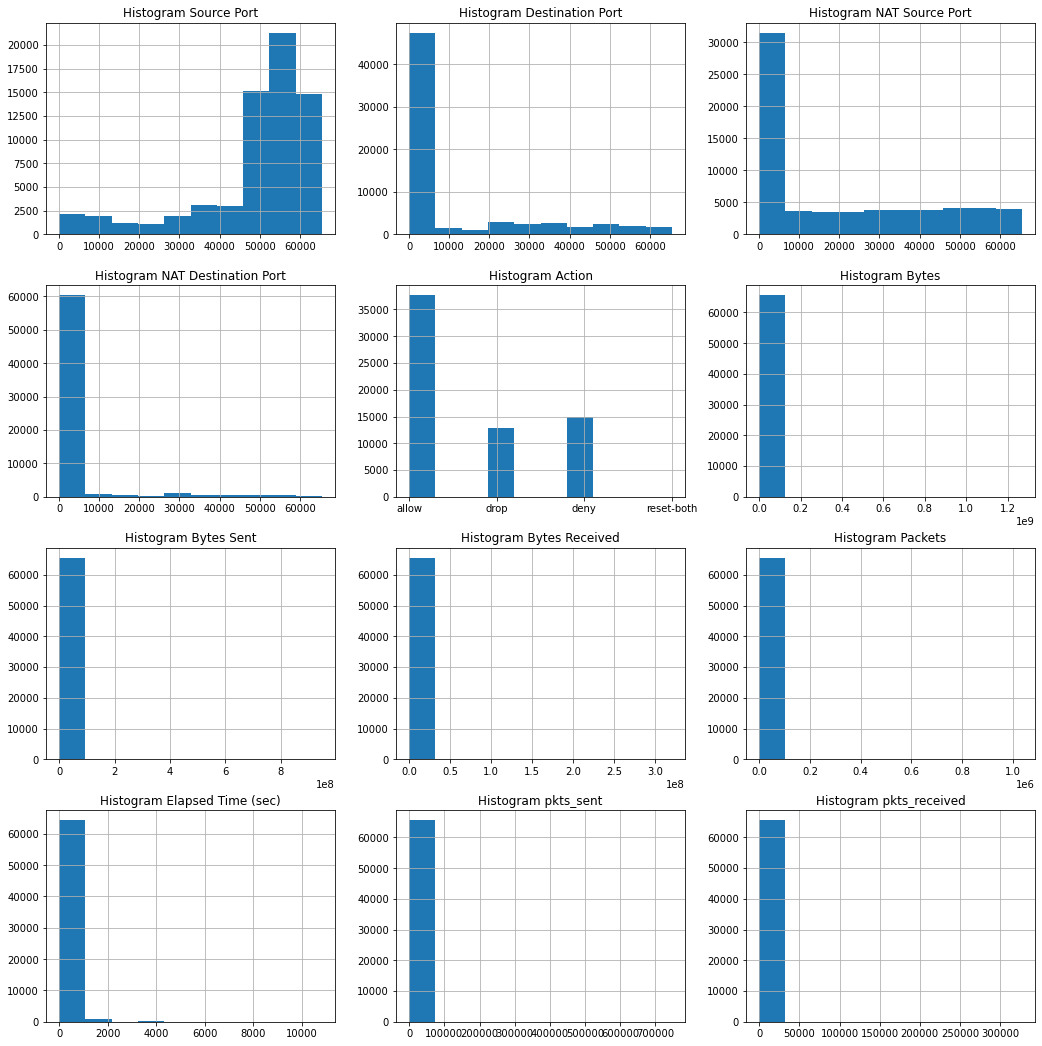

In [10]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
fig.tight_layout(pad=3.0)  # Menambahkan ruang antar subplot

# Menggunakan loop untuk membuat dan menampilkan histogram
for i, ax in enumerate(axes.flatten()):
    if i < len(data.columns):  # Pastikan indeks tidak melebihi jumlah kolom data
        if data[data.columns[i]].dtype == 'object' or data[data.columns[i]].dtype == 'int64':
            data[data.columns[i]].hist(ax=ax)
            ax.set_title(f'Histogram {data.columns[i]}')

# Menampilkan grafik
plt.show()

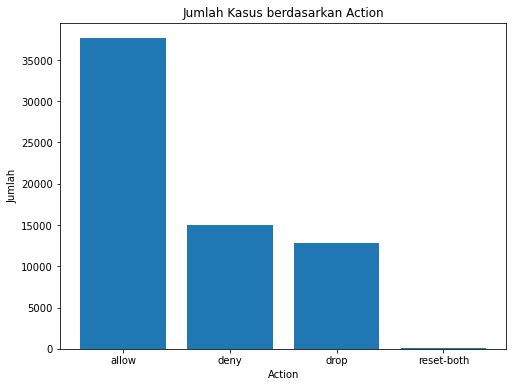

In [11]:
action_counts = data['Action'].value_counts()
# Membuat grafik batang
plt.figure(figsize=(8, 6))
plt.bar(action_counts.index, action_counts.values)
plt.xlabel('Action')
plt.ylabel('Jumlah')
plt.title('Jumlah Kasus berdasarkan Action')
plt.show()

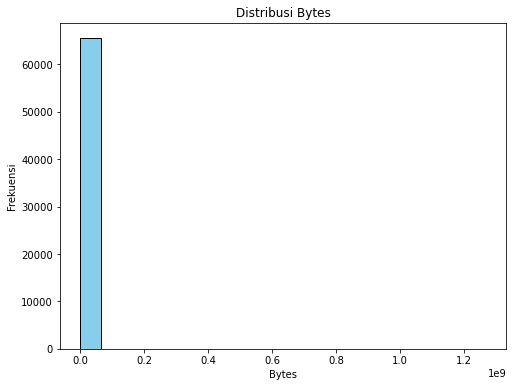

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(data['Bytes'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Bytes')
plt.ylabel('Frekuensi')
plt.title('Distribusi Bytes')
plt.show()

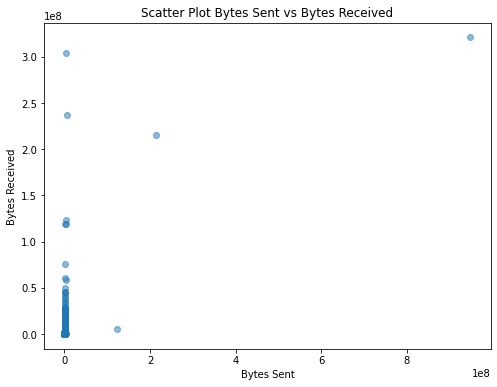

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Bytes Sent'], data['Bytes Received'], alpha=0.5)
plt.xlabel('Bytes Sent')
plt.ylabel('Bytes Received')
plt.title('Scatter Plot Bytes Sent vs Bytes Received')
plt.show()

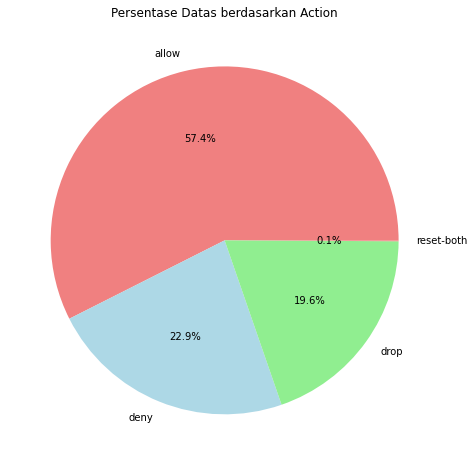

In [14]:
action_counts = data['Action'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(action_counts, labels=action_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Persentase Data berdasarkan Action')
plt.show()

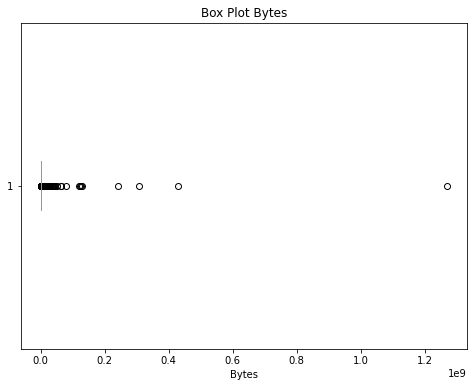

In [15]:
plt.figure(figsize=(8, 6))
plt.boxplot(data['Bytes'], vert=False)
plt.xlabel('Bytes')
plt.title('Box Plot Bytes')
plt.show()

In [14]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


### Describe data

Describe data digunakan untuk memberikan nilai statistik deskriptif dari suatu dataframe dari masing-masing fitur dengan hasil sebagai berikut :
  - Jumlah data (Count) : memberikan informasi tentang jumlah data yang tidak bernilai 'NaN' setiap kolom. Jumlah ini mencakup data yang tidak bernilai NaN atau missing Value.
  - Rata-rata (Mean) : Rata-rata atau mean adalah nilai tengah dari distribusi data. Ini dihitung dengan menjumlahkan semua nilai dan kemudian mdibagi dengan jumlah total dari data.
  - std (standar deviasi) : Standar deviasi mengukr sejauh mana data tersebar dari rata-rata. Sebaran data, standar deviasi yang tinggi menunjukkan bahwa data cenderung lebih tersebar atau tingkat variabilitas yang lebih besar dalam dataset.
  - Nilai Minimum (Min)  : menunjukkan nilai terkecil pada setiap kolom
  - 25% atau Q1 : Menunjukkan nilai kuartil pertama menunjukkan nilai yang membagi 25% data terandah. Baris ini memberikan informasi tentang distribusi data di bagian bawah.
  -  50% : Median atau Q2, adalah nilai yang membagi data menjadi dua bagian setara. Jika data diurutkan, median berada di tengah-tengah. Ini memberikan gambaran tentang pusat distribusi.
  - 75% atau Q3 : Baris 75% atau kuartil ketiga(Q3) menunjukkan nilai membagi 75% data terendah. Ini memberikan informasi tentang distribusi data di bagian atas.
  - max :  Nilai terbesar dalam setiap kolom. Baris ini memberikan gambaran tentang rentang nilai yang terdapat dalam dataset.

In [15]:
data.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


Penjelasan :

Pada data firewall ini, langkah untuk describe data menggunakan fungsi 'describe' yang terdapat pada library pandas di python. Dengan menggunakan describe(), akan mempercepat untuk mendapatkan gambaran tentang distribusi dan statistik dasar dari dataset. 

### Duplikat data

Melakukan identifikasi  data yang error atau inkonsisten. Ketika menemui data duplikat, yang bisa dilakukan adalah memperbaiki dan melakukan penghapusan.  Mengidentifikasi data duplikat penting untuk dilakukan pada pengolahan data untuk memastikan integritas data dan hasil analisis yang akurat.
Dari data sejumlah 65532 ditemukan jumlah data yang duplikat sebanyak 8362 data.  Sehingga, jumlah data duplikat akan dihilangkan pada tahap preprocessing.

Untuk mengetahui nilai duplikat dari dataframe yang disimpan dalam variabel 'data' menggunakan :
- data.dupicated() : pada dataframe digunakan untuk melakukan identifikasi baris-baris yang duplikat dalam dataset.
- sum() : fungsi sum ditulis setelah 'data.duplicated()', karena dalam fungsi tersebut telah  didapatkan seri boolean. Llau, untuk menjumlahkan nilai 'True' . Nilai 'true' dianggap setara dengan nilai 1 dan nilai 'False' atau yang tidakd uplikat disetarakan dengan nilai 0 dalam operasi penjumlahan. Hasil dari fungsi 'sum)' memberikan jumlah baris yang teridefntifikasi sebagai data duplikat.

- 'jumlah_duplikat' : variabel ini digunakan untuk menyimpan hasil penjumlahan tersebut, yaitu jumlah baris  yang dianggap duplikat dalam dataset.

In [16]:
jumlah_duplikat = data.duplicated().sum()
print("Jumlah data yang duplikat:", jumlah_duplikat)

Jumlah data yang duplikat: 8362


### Missing value

Missing value setiap kolom pada dataset perlu dilakukan pengecekan karena memastikan data yang akan digunakan dalam model tidak mengandung nilai yang tidak lengkap. Dari pengecekan data firewall dengan total 65532 data ini tidakk ditemukan missing value. Yang artinya, semua kolom terdapat kelengkapan isian data. Sehingga, pada tahap preprocessing tidak perlu dilakukan penghapusan missing value.
Penting untuk menangani nilai yang hilang karena banyak algoritma pembelajaran mesin tidak dapat menangani nilai yang hilang secara langsung. 



In [17]:
# Menghitung apakah ada nilai yang hilang dalam setiap kolom
missing_values = data.isna().any()

print("Apakah ada nilai yang hilang dalam setiap kolom:")
print(missing_values)

Apakah ada nilai yang hilang dalam setiap kolom:
Source Port             False
Destination Port        False
NAT Source Port         False
NAT Destination Port    False
Action                  False
Bytes                   False
Bytes Sent              False
Bytes Received          False
Packets                 False
Elapsed Time (sec)      False
pkts_sent               False
pkts_received           False
dtype: bool


Penjelasan 

- data.isna(), metode ini menghasilkan DatFrame yang telah disimpan sebelumnya dalam variabel data yang berisi nilai boolean yaitu ('True' atau 'False'). Setiap elemen dalam DataFrame menjadi 'True' jika elemen teridentifikasi nilai yang hilang atau nilai kosong. 

- any : pada pengolahan datadrame boolean untuk menunjukkan apakah setiap kolom terdapat missing value. 

Mengecek baris dengan nilai Null(NaN)

Untuk melakukan penghapusan baris atau kolom yang mengandung nilai null atau NaN dari Data dengan menggunakan dropna(). Diikuti dengan parameter  inplace = True, sehingga perubahan akan langsung dilakukan pada DataFrame. Nilai nan akan dihapus dari DatFrame dan perubahan diterapkan langsung pada DatFrame. Namun, jika inplace menggunakan 'false' maka metide ini mengembalikan data baru dengan nilai null dihapus dan untuk menyimpannya memerlukan variabel baru. Namun, pada data ini tidak ditemukan data NaN(Not a Number).

Penjelasan :

- Penggunaan  data.isna() menghasilkan DataFrame yang ukurannya sama dengan DataFrame asli (data). Nilainya berupa 'True' dan 'False, jika output 'true' maka data menunjukkan nilai NaN pada posisi yang sesuai tabel diatas. namun, dari hasil pengecekan tersebut semua baris tidak diidentifikasi sebagai nilai NaN sehingga nilainya 'False'

- sum() digunakan untuk menghitung jumlah nilai 'True' atau nilai NaN di setiap kolom

In [18]:
data.isna()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,False,False,False,False,False,False,False,False,False,False,False,False
65528,False,False,False,False,False,False,False,False,False,False,False,False
65529,False,False,False,False,False,False,False,False,False,False,False,False
65530,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
print('Jumlah nilai NaN setiap kolom :')
print(data.isna().sum())

Jumlah nilai NaN setiap kolom :
Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Action                  0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
dtype: int64


### Deteksi Outlier

Kumpulan data yang berisi informasi data yang memiliki nilai atau karakteristik yang menyimpang dari yang lain, dikenal sebagai *outlier*. *Outlier* dapat dilakukan penghapusan supaya data lebih akurat karena jika *outlier* dibiarkan dapat menyebabkan kesimpulan yang tidak akurat dan keputusan yang dihasilkan salah.

Metode penghapusan outlier : 

   - a. IQE (Interquartile Range)
        Metode ini menggunakan nilai kuartil rentang antara kuartil pertama(Q1) dan kuartil ketiga(Q3) suatu data dengan melakukan perhitungan IQR(Q3-Q1). Nilai di luar rentang(Q1-1.5*IQR) dan (Q3+1.5*IQR) dianggap sebagao outlier dan dapat dihapus dari dataset.
        
   - b. Z-Score
        Metode dengan Z-Score ini dengan melakukan perhitungan skor Z untuk setiap nilai dalam dataset. Nilai  dengan skor Z di atas atau di bawah ambang (threshold) tertentu dianggap sebagai outlier dan dapat dilakukan penghapusan. 
   - c. Transformasi Data(Transformasi Log)
   - d. Mengganti Outlier dengan Median
   
       Outlier dapat diganti dengan statistik yang lebih kuat seperti median untuk mengurangi dampak yang dihasilkan terhadap analisis. Contoh code: 
        median = np.median( data ) 
        data_tanpa_outliers = np. dimana (( data < batas_bawah) | ( data > batas_atas), median, data )
    
    
  Pada pengolahan data ini deteksi outlier menggunakan Z-Score. Z-Score mengukur seberapa jauh suatu titik data dari mean dalam satuan standar deviasi. Nilai Z-Score yang tinggi atau rendah menunjukkan bahwa titik data tersebut berada jauh dari rata-rata. Berikut adalah tahapan-tahapan deteksi outlier dengan Z-Score:
  
  1.) Hitung rata-rata dan standar deviasi
    
   - Melakukan perhitungan rata-rata ($\mu$) dan standar deviasi ($\sigma$)dari dataset
   
   $\mu =\frac{\sum_{i=1}^{n}x_i}{n} $
   
   $\sigma = \sqrt\frac{\sum{i=1}^n x_i - \mu}{n}$
   
   
2.) Hitung Z-Score untuk setiap data
 - Hitung Z-score untuk setiap titik data dalam dataset dengan rumus berikut : 
  
  $Z_i = \frac{x_i -\mu}{\mu}$
  
  $x_i$ adalah nilai titik data, $\mu$ adalah rata-rata, dan $\sigma$ adalah standar deviasi.

3.) Tentukan ambang batas(threshold)
- Menentukan ambang batas(threshold) yang akan digunakan untuk mengidentifikasi outlier.

4.) Identifikasi outlier
- Mengidentifikasi titik data yang memiliki nilai Z-Score di atas atau di bawah nilai ambang batas yang ditentukan sebagai outlier. Titik-titik ini dianggap jauh dari rata-rata dan dianggap sebagai nilai yang tidak biasa dalam dataset.

Contoh implementasi perhitungan manual dengan menggunakan algoritma Z-Score pada data berikut ini:


\begin{array}{ccc}
\hline
X & Y & Z \\
\hline
10 & 25 & 5 \\
\hline
15 &30 & 8\\
\hline
12&35&10 \\
\hline
8 & 22 & 4 \\
\hline
14&40&15 \\
\hline
16&38&12\\
\hline
20&28&18
\end{array}
\
  1.) Hitung rata-rata dan standar deviasi
    
   - Melakukan perhitungan rata-rata ($\mu$) dan standar deviasi ($\sigma$)dari dataset
   
   $Rata-rata(\mu_X) =\frac{\sum{X}}{n} = \frac{10+15+12+8+14+16+20}{7}= 14 $
   
   $Standar Deviasi(\sigma_X) = \sqrt\frac{\sum{(X- \mu_X)}^2 }{n} = \sqrt\frac{(10-14)^2 +(15-14)^2+(12-14)^2+(8-14)^2+(14-14)^2+(16-14)^2+(20-14)^2}{7} = 3.72 $
   
   $Rata-rata(\mu_Y) =\frac{\sum{Y}}{n} = \frac{25+30+35+22+40+38+28}{7}= 31 $
   
   $Standar Deviasi(\sigma_Y) = \sqrt\frac{\sum{(Y- \mu_Y)}^2 }{n} = \sqrt\frac{(25-31)^2 +(30-31)^2+(35-31)^2+(22-31)^2+(40-31)^2+(38-31)^2+(28-31)^2}{7}= 6.24 $
   
   $Rata-rata(\mu_Z) =\frac{\sum{Z}}{n} = \frac{5+8+10+4+15+12+18}{7}= 10.3$
   
   $Standar Deviasi(\sigma_Z) = \sqrt\frac{\sum{(Z- \mu_Z)}^2 }{n} = \sqrt\frac{(10-10.3)^2 +(15-10.3)^2+(12-10.3)^2+(8-10.3)^2+(14-10.3)^2+(16-10.3)^2+(20-10.3)^2}{7}= 4.7 $
   
2.) Hitung Z-Score untuk setiap data
 - Hitung Z-score untuk setiap titik data dalam dataset dengan rumus berikut : 
  
  $Z_X = \frac{X -\mu_X}{\sigma_X}$
 
  $Z_Y = \frac{Y -\mu_Y}{\sigma_Y}$
  
  $Z_Z = \frac{Z -\mu_Z}{\sigma_Z}$

3.) Tentukan ambang batas(threshold)
- Misalnya, menentukan nilai ambang batas sebagai $\pm 2$ standar deviasi.

4.) Identifikasi outlier
 
 $Outlier_X :$ Jika $|Z_x| > $Threshold, maka outlier
 
  $Outlier_Y :$ Jika $|Z_x| > $Threshold, maka outlier
  
   $Outlier_Z :$ Jika $|Z_x| > $Threshold, maka outlier
   
5.) Hasil



| Data point | X | Y | Z | $Z_x$ | $Z_x$ | $Z_x$ |Outlier|
|------------|---|---|---|-------|-------|-------|-------|
| 1|10 | 25 |5 |-1.08|-0.96|-1.11|No|
| 2|15 | 30 |8 |0.27|-0.16|-0.49|No|
|3|12 | 35 |10 |-0.54|0.64|-0.06|No|
|4| 8 | 22 |4 |-1.61|-1.44|−1.32|Yes|
|5| 14 | 40 |15 |0.00|1.44|1.00|No|
|6| 16 | 38 |12 |0.54|1.12|0.36|No|
|7| 20 | 28 |18 |1.61|-0.48|1.62|No|

Pada data point 1
   - |$Z_X$| = |-1.08| = 1.08 tidak melebih threshold, sehingga data point 1 pada fitur X bukan outlier.

   - |$Z_Y$| = |-0.96| = 0.96 tidak melebih threshold, sehingga data point 1 pada fitur Y bukan outlier.  

   - |$Z_Z| = |-1.11|= 1.11 tdak melebih threshold, sehingga data point 1 pada fitur Z bukan outlier.
   
Pada data point 2
   - |$Z_X$| = |0.27| = 0.27 tidak melebihi threshold, sehingga data point 1 pada fitur X bukan outlier.

   - |$Z_Y$| = |-0.16| = 0.16 tidak melebihi threshold, sehingga data point 1 pada fitur Y bukan outlier.  

   - |$Z_Z| = |-0.49| =0.49 tidak melebihi threshold, sehingga data point 1 pada fitur Z bukan outlier.
   

  Pada data firewall ini dilakukan deteksi outlier dilakukan pada kolom yang berisi nilai numeric menggunakan ZScore.Deteksi outlier tidak perlu dilakukan di semua kolom atau fitur dalam dataset.  Pada datset ini yang dilakukan deteksi outlier adalah pada kolom 'Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received' karena pada kolom ini sebagai variabel kuantitatif . Deteksi outlier tersebut didapatkan dengan hasil masing-masing kolom memiliki nilai outlier 1640.

In [21]:
numeric_columns = ['Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received']

# Menghitung Z-score untuk setiap kolom numerik
z_scores = np.abs(stats.zscore(data[numeric_columns]))
# Menentukan ambang batas Z-score (misalnya, 3)
threshold = 3

# Mengidentifikasi indeks baris yang memiliki outlier
outlier_indices = np.where(z_scores > threshold)

# Mengidentifikasi indeks baris yang memiliki outlier
outlier_indices = np.where(z_scores > threshold)
print("Indeks baris yang memiliki outlier:")
print(outlier_indices[0])
print("Nilai outlier untuk setiap kolom:")
outlier_values = data.iloc[outlier_indices[0]][numeric_columns]
print(outlier_values)
print("Jumlah outlier untuk setiap kolom:")
outlier_counts = pd.DataFrame(outlier_values.apply(lambda x: x.count(), axis=0), columns=['Outlier Count'])
print(outlier_counts)

Indeks baris yang memiliki outlier:
[    2   121   122 ... 65290 65296 65296]
Nilai outlier untuk setiap kolom:
          Bytes  Bytes Sent  Bytes Received  Packets  Elapsed Time (sec)  \
2           238         118             120        2                1199   
121         870         330             540       12                2308   
122     8171028      105740         8065288     6637                 149   
124         481         150             331        2                1200   
335         330         330               0        6                1200   
...         ...         ...             ...      ...                 ...   
65286       481         150             331        2                1199   
65289       118         118               0        1                1199   
65290       324         150             174        2                1201   
65296  11381441      121813        11259628     9309                 119   
65296  11381441      121813        11259628     9309

Penjelasan :
1. Menghitung Z-score 
        
     - Menggunakan stats.zscore dari modul scipy untuk menghhitung Z-score setiap nilai dalam kolom numerik.
2. Menentukan ambang batas
    - Dengan menggunakan ambang batas tertentu digunakan untuk mengidentifikasi outlier. Dalam contoh ini, ambang batas diatur sebagai 3, yang merupakan nilai ambang batas yang umum digunakan.
 
3. Mengidentifikasi Indeks Baris dengan Outlier
    - Menggunakan np.where untuk mengidentifikasi indeks baris yang memiliki nilai Z-score melebihi ambang batas. Outlier diidentifikasi jika nilai Z-score melebihi ambang batas.
  
4. Menampilkan Indeks Baris dan Nilai Outlier dengan 'np.where' 

5. Menghitung dan menampilkan Jumlah Outlier untuk Setiap Kolom:
    - Menggunakan apply dan lambda:
        
        - outlier_values.apply(lambda x: x.count(), axis=0) digunakan untuk mengiterasi melalui setiap kolom dalam outlier_values dan menghitung jumlah nilai yang bukan NaN (tidak termasuk nilai yang hilang) dalam setiap kolom.

        - pd.DataFrame(..., columns=['Outlier Count']) digunakan untuk membuat DataFrame baru dengan nama kolom "Outlier Count". Outlier count berisi total  dari nilai yang diidentifikasi sebagai oulier dalam kolom tersebut.
        - Hasil dari langkah pertama, yaitu jumlah outlier untuk setiap kolom, dimasukkan ke dalam kolom ini.

### Proporsi data

Berdasarkan identifikasi jumlah data pada 4 kelas  terdapat ketidakseimbangan data, beberapa kelas memiliki lebih banyak sampel daripada yang lain. Karena ketidakseimbangan dapat mempengaruhi kinerja model, karena model dapat cenderung memprediksi kelas mayoritas. Maka data ini perlu dilakukan balancing data.

In [22]:
print("Sebaran kelas target pada kolom Action")
print(action_counts)

Sebaran kelas target pada kolom Action
allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64


**Seleksi fitur**

Berdasarkan banyak fitur pada data ini yaitu 12 fitur dengan 1 fitur adalah target atau kelas. Jadi terdapat 11 fitur yang akan dipertimbangkan, kolom mana yang memiliki pengaruh tinggi. Untuk mendapatkan fitur yang memiliki pengaruh tinggi perlu dilakukan seleksi fitur. 

Cara kerja seleksi fitur ialah dengan menentukan fitur yang paling relevan dan melakukan pembobotan pada setiap fitur. Seleksi fitur sendiri bertujuan untuk meningkatkan efisiensi dan efektivitas hasil dari kinerja algpritma klasifikasi (Buani, 2021)

## 3. PREPROCESSING
Tahap preprocessing adalah tahapan untuk mempersiapkan data sebelum dilakukan pembuatan model. Pada tahap preprocessing, data akan dibersihkan, diubah, dan disesuaikan agar data sesuai dengan kebutuhan pada model machine learning yang akan digunakan. 
Tahap preprocessing merupakan langkah-langkah untuk membersihkan dan menyiapkan data sebelum memasukkan ke dalam model. 

Preprocessing yang akan dilakukan berdasarkan tahap data understanding yaitu :
    
- Menghapus duplikat data
- Menghapus Outlier
- Proporsi data yang tidak seimbang , sehingga  perlu dilakukan balancing data
- Encoding pada kolom 'Action' yang merupakan bukan tipe data numerik
- Seleksi Fitur 
- Split dataset
- Normalisasi

### Menghapus Duplikat data

Pada dua baris dianggap duplikat jika seluruh nilai dalam baris tersebut bernilai sama persis. Pada implementasi ini, menggunakan fungsi 'drop_duplicates' untuk menghapus duplikat. Pada tahap data understanding sebelumnya, telah melakukan pengecekan banyak data yang teridentifikasi duplikat, sehingga pada tahap preprocessing ini dilakukan penghapusan data duplikat yang dapat mengganggu analisis dan menghasilkan hasil yang tidak akurat.  . Dengan menggunakan library pandas, dapat menggunakan 'drop_duplicates()' untuk membersihkan DataFrame dari baris-baris yang identik atau duplikat.

In [23]:
# variabel data yang menyimpan data dilakukan drop atau penghapusan data yang  duplikat
data.drop_duplicates(inplace=True)

Untuk melakukan penghapusan data yang duplikat dengan menggunakan perintah di bawah ini :

- 'data' : data adlaah variabel yang menyimpan dataset atau sebagai objek DataFrame 

- 'drop_duplicates' : Metode ini digunakan untuk menghapus baris yang teridentifikasi duplikat pada DataFrame. FUngsi ini akan mempertahankan satu abris dari setiap duplikat dan baris duplikat lainnya akan dihapus.

- 'inplace=True' : Parameter ini idgunakan untuk mengubah DataFrame yang ada secara langsung tanpa membuat salinan data baru. Namun, jika 'inplace=False', metode ini akan mengembalikan DataFrame  yang sudah diubah atau pada tahap ini sudah dilakukan penghapusan.

    Jika terdapat baris-baris duplikat dalam DataFrame, mereka akan dihapus, dan DataFrame akan diubah secara langsung (jika inplace=True). Jika tidak ada duplikat, DataFrame tetap tidak berubah.

### Menghapus Outlier Data

In [24]:
numeric_columns = ['Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received']

# Menghitung Z-score untuk setiap kolom numerik
z_scores = np.abs(stats.zscore(data[numeric_columns]))
# Menentukan ambang batas Z-score (misalnya, 3)
threshold = 3

# Mengidentifikasi indeks baris yang memiliki outlier
outlier_indices = np.where(z_scores > threshold)

# Mengidentifikasi indeks baris yang memiliki outlier
outlier_indices = np.where(z_scores > threshold)
print("Indeks baris yang memiliki outlier:")
print(outlier_indices[0])

print("Nilai outlier untuk setiap kolom:")
outlier_values = data.iloc[outlier_indices[0]][numeric_columns]
print(outlier_values)

print("Jumlah outlier untuk setiap kolom:")
outlier_counts = pd.DataFrame(outlier_values.apply(lambda x: x.count(), axis=0), columns=['Outlier Count'])
print(outlier_counts)

# Menghapus baris yang memiliki outlier
data_cleaned = data.drop(data.index[outlier_indices[0]])

print("Data setelah dibersihkan dari outlier")
print(data_cleaned)


Indeks baris yang memiliki outlier:
[    2   121   122 ... 56994 57000 57000]
Nilai outlier untuk setiap kolom:
          Bytes  Bytes Sent  Bytes Received  Packets  Elapsed Time (sec)  \
2           238         118             120        2                1199   
121         870         330             540       12                2308   
122     8171028      105740         8065288     6637                 149   
124         481         150             331        2                1200   
335         330         330               0        6                1200   
...         ...         ...             ...      ...                 ...   
65286       481         150             331        2                1199   
65289       118         118               0        1                1199   
65290       324         150             174        2                1201   
65296  11381441      121813        11259628     9309                 119   
65296  11381441      121813        11259628     9309

### Balancing Data

Balancing data dilakukan menggunakan RandomOverSampler. Dari hasil pengujian didapatkan hasil terbaik menggunakan RandomOverSampler meningkatkan akurasi prediksi.Hasil penelitian yang dilakukan oleh Iwan Binanto menyatakan bahwa dengan menggunakan balancing Random Over Sampler didapatkan akurasi yang tinggi pada permodelan. Metode balancing RandomOverSampler bertujuan untuk menambahkan salinan acak dari sampel-sampel yang sudah ada pada kelas tersebut. Proses kerja sebagai berikut :
- menentukan kelas minorittas yang memiliki jumlah sampel yang lebih sedikit
- menentukan jumlah sampel tambahan, dengan menghitung perbedaan jumlah pada mayoritas dan minoritas.

Penanganan Imbalance data jika kolom target Action terdapat ketidakseimbangan berupa oversampling atau undersampling

Algoritma Random Over Sampler :

1) Hitung jumlah sampel kelas mayoritas dan kelas minoritas

    - Nmayoritas : Jumlah sampel pada kelas mayoritas
    - Nminority : 

2) Hitung jumlah yang perlu ditambahkan 
    
    - Nnew = Nmayoritas - Nminoritas 
    
    Hasil dari Nnew ini adalah yang akan ditambahkan pada kelas minoritas agar seimbang dengan kelas mayoritas.
    

3) Pilih instansi secara acak dari kelas minoritas

   - Pilih Nnew sampel secara acak dari kelas minoritas untuk ditambahkan ke dataset

4) Tambahkan Sampel Baru ke Dataset:

- Tambahkan Nnew instansi yang dipilih ke dataset

Contoh perhitungan manual :

1. Hitung jumlah sampel kelas mayoritas dan kelas minoritas 
    
    - Nmayoritas = 100 
    - Nminoritas = 30
    
2) Hitung jumlah yang perlu ditambahkan 

    - Nnew = Nmayoritas - Nminoritas = 100 - 30 = 70

3) Pilih sampel secara acak dari kelas minoritas

    - Secara acak memilih 70 sampel dari kelas minoritas 
4) Tambahkan Sampel Baru ke Dataset

    - Tambahkan 70 sampel yang dipilih ke dalam dataset.

Dengan menggunakan bahasa pemrogra,an python, untuk melakukan penerapan metode balancing Random Over Sampler dengan mengunakan library untuk oversampling , seperti imbalanced-learn dari imblearn. Berikut adalah penggunaan Random Over Sampler :

In [25]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

Data sebelum di balancing, dilakukan pemisahan fitur dan target

In [26]:
X = data.drop('Action', axis=1)
y = data['Action']
print("Output data asli sebelum dilakukan balancing data")
print( Counter(y))

Output data asli sebelum dilakukan balancing data
Counter({'allow': 37439, 'drop': 11635, 'deny': 8042, 'reset-both': 54})


In [27]:
# inisialisasi randomOverSampler dengan variabel ros
ros = RandomOverSampler(random_state=42)
# Melakukan oversampling pada dataset
X_ros, y_ros = ros.fit_resample(X,y)
print('Output data resampled : ', Counter(y_ros))

Output data resampled :  Counter({'allow': 37439, 'drop': 37439, 'deny': 37439, 'reset-both': 37439})


Pada proses oversampling dataset , 'X' adalah matriks fitur dan 'y' adlaah vektor target. Metode 'fit_resample' akan melakukanobversampling pada dataset dan mengembalikan dataset yang baru yang sudah dilakukan oversample.

In [28]:
print('Jumlah data setelah dilakukan balancing resampled : ')
print('Features',X_ros.shape)
print('Target',y_ros.shape)

Jumlah data setelah dilakukan balancing resampled : 
Features (149756, 11)
Target (149756,)


Data yang semula berjumlah 65532 disimpan di variabel 'data', setelah dilakukan preprocessing penghapusan data duplikat dan data oulier kemudian dilakukan balancing data berubah menjadi 149756. Setelah melakukan balancing data, data akan disimpan menjadi data baru lagi. Pada data ini, data yang telah diakukan pembersihan dan balancing data disimpan di variabel balanced_data.

In [29]:
# Menggabungkan kembali X_ros dan y_ros menjadi DataFrame
balanced_data = pd.DataFrame(X_ros, columns=X.columns)
balanced_data['Action'] = y_ros.reset_index(drop=True)

Setelah dilakukan penerapan metode balancing Oversampling, jumlah data dalam dataset meningkat. Karena Oversampling ini menambahkan jumlah sampel dari kelas minoritas dengan cara menggandakan atau  menambahkan variasi pada sampel yang sudah ada.

In [30]:
jumlah_data = balanced_data.shape[0]
print("Jumlah Data Firewall :", jumlah_data)

Jumlah Data Firewall : 149756


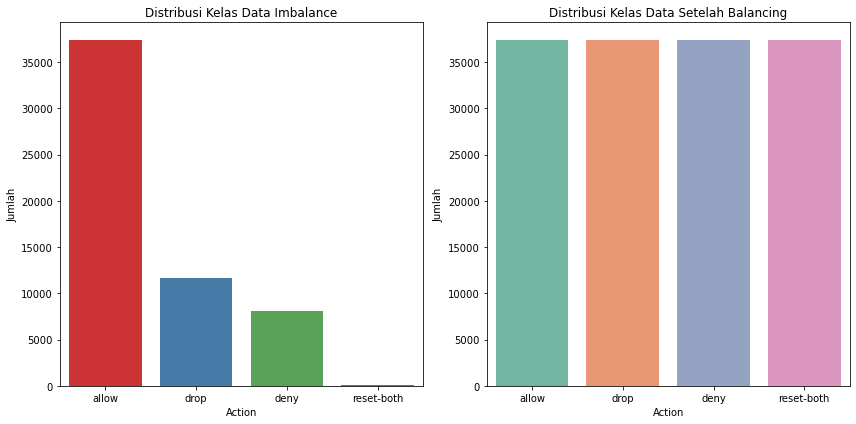

In [31]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Action', data=data, palette='Set1')
plt.title("Distribusi Kelas Data Imbalance")
plt.xlabel("Action")
plt.ylabel("Jumlah")
# plt.show()

plt.subplot(1, 2, 2)
sns.countplot(x='Action', data=pd.DataFrame(y_ros, columns=['Action']), palette='Set2')
plt.title("Distribusi Kelas Data Setelah Balancing")
plt.xlabel("Action")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()

### Encoder

Label Encoder digunakan untuk mengkonversi nilai pada kolom target 'Action' yang semula bersifat kategorikal 'allow' , 'deny', 'drop', dan 'reset both' diubah menjadi numerik.



In [32]:
X_ros = balanced_data.drop(columns=['Action'])
label_encoder = LabelEncoder()
y_ros = label_encoder.fit_transform(balanced_data['Action'])

Penjelasan :
    
- X_ros sebagai variabel yang menghapus kolom target dari dataset awal.

- label_encoder = LabelEncoder() membuat objek dari kelas LabelEncoder. LabelEncoder digunakan untuk mengubah label kategori menjadi bilangan bulat.

- y_rose sebagai avriabel yang menyimpan label yang telah diubah menjadi bentuk numerik. Dengan 'fit_transform ()' mempelajari mapping antara tabel kategori dan bilangan bulat yang kemudian mengubah label katgeori menjadi bilangan bulat(transform)

### Fiture Selection

Dalam menghasilnya performa pengolahan data, fungsi dari proses seleksi fitur menghasilkan dataset yang lebih ramping karena dalam seleksi fittur akan dilakukan pengurangan jumlah fitur / atribut yang diperoleh dari pengukuran fitur-fitur yang memiliki pengaruh signifkan terhadap kelas. Dalam seleksi fitur terdapat metode-metode yang digunakan untuk mengetahui fitur yang memberikan pengaruh terhadap kelas dari dataset yang digunakan.

Macam-macam seleksi fitur:
- Information Gain

    Seleksi fitur Information Gain dengan mengukur sejauh mana suatu fitur memberikan informasi yang berguna dalam memprediksi label kelas.
- Correlation Based

    Seleksi fitur Correlation Based dengan memilih fitur berdasarkan tingkat korelasi dengan variabel target. 
- Learner Based

    Seleksi Learner Based melibatkan penggunaan model pembelajaran untuk mengevaluasi kontribusi setiap fitur. Model dibangun untuk memprediksi target, dan fitur dinilai berdasarkan pengaruhnya terhadap kinerja model.
- Mutual Information

    Seleksi fitur Mutual Information mengukur sejauh mana pengetahuan tentang nilai satu variabel memberikan informasi tentang nilai variabel lainnya. Pada mutual innformation, dengan menggunakan 'mutual_info_classif digunakan untuk mengevaluasi relevansi antara fitur-fitur dan kelas target dalam menanagani masalah klasifikasi. entropy
- Principal Component Analysis (PCA)

    Seleksi fitur dengan PCA digunakan untuk mengurangi dimensi data ke ruang fitur yang lebih rendah. Komponen utama yang dihasilkan adalah kombinasi linear dari fitur asli yang menyimpan varian maksimal.
- Genetic Alghoritms
    Seleksi fitur genetic algorithms menerapkan konsep seleksi alam untuk menemukan subset fitur yang optimal. Pada genetic algorithms menggunakan konsep seleksi, crossover, dan mutasi untuk menghasilkan generasi baru dari subset fitur dan meningkatkan kualitasnya seiring waktu.

Pada tahap seleksi fitur pengolahan data klasifikasi ini dengan menggunakan mutual information. 

**Rumus Mutual Information**
)=
$$I(A;Y) = \sum P(A,Y) .log_2 (\frac{P(A,Y)}{P(A).P(Y)}) $$
dimana $P(A,Y)$ adalah probabilitas kombinasi nilai $(A, Y), P(A)$ adalah probabilitas nilai A, dan $P(Y)$ adalah probabilitas nilai Y.

**Algoritma seleksi fitur mutual information :**

1. Perhitungan Informasi untuk setiap fitur

    Menghitung nilai informasi bersama antara setiap fitur dan variabel target(kelas) dalam dataset. Mutual Information dapat dihitung menggunakan formula atau fungsi yang mengukur seberapa banyak informasi yang dimiliki fitur tentang target.
2. Penilaian relevansi

    Fitur-fitur dinilai berdasarkan nilai informasi bersama yang dihasilkan dari perhitungan sebelumnya. Fitur dengan nilai informasi bersama yang tinggi dianggap lebih relevan atau informatif terhadap variabel target. Mengurutkan fitur-fitur berdasarkan nilai Mutual Information dari yang tertinggi sampai terendah. Fitur dengan nilai Mutual Information yang lebih tinggi dianggap lebih informatif terkait dengan target(Irham et al., 2019).
3. Pemilihan fitur
    Sebagai hasil dari penilaian, dengan menentukan ambang atau kriteria tertentu untuk memilih subset fitur. Subset fitur yang melewati ambang relevansi dipertahankan, sementara yang di bawah ambang dapat dihapus.
4. Implementasi dalam kode :
    
    - menggunakan fungsi mutual_info_classif dari scikit-learn untuk menghitung nilai informasi bersama. Melakukan perhitungan skor informasi bersama untuk setiao fitur dalam dataset 'X' terhadap variabel target 'y'. 
    - Menyimpan skor informasi bersama
    - Memvisualisasikan seleksi fitur dengan grafik batang horizontal atau lainnya untuk mengetahui seberapa informatif setiap fitur terhadap variabel target. 

**Contoh perhitungan manual mutual information**
Dataset:

| A | B | Y |
|---|---|---|
| 0 | 0 | 1 |
| 1 | 1 | 1 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 0 | 1 | 1 |


Langkah-langkah :

1. Hitung Frekuensi Masing-Masing Kombinasi Nilai
    - Membuuat tabel untuk menggambarkan frekuensi masing-masing kombinasi nilai dari fitur dan target, pada contoh dua fitur (A dan B) dan fitur Y sebagai target
    
|    | A=0 | A=1 |
|----|-----|-----|
| B=0|  ?  |  ?  |
| B=1|  ?  |  ?  |

     - Misalnya, berapa kali kombinasi (A=0, Y=1) muncul, (A=0, Y=0), dst.
    
|    | A=0 | A=1 |
|----|-----|-----|
| B=0|  1  |  1  |
| B=1|  2  |  2  |

    Penjelasan :

    - Kombinasi (A=0, B=0): Terdapat 1 sampel (baris pertama).
    - Kombinasi (A=1, B=0): Terdapat 1 sampel (baris keempat).
    - Kombinasi (A=0, B=1): Terdapat 2 sampel (baris ketiga dan kelima).
    - Kombinasi (A=1, B=1): Terdapat 2 sampel (baris kedua dan keempat).
    
2. Hitung Probabilitas Masing-Masing Kombinasi:


     - Total sampel adalah jumlah total baris dalam dataset
     
    P(A=0, Y=0) = 1 / total_sampel 
    P(A=1, Y=0) = 1 / total_sampel
    P(A=0, Y=1) = 1 / total_sampel
    P(A=1, Y=1) = 2 / total_sampel
    
    Pada contoh perhitungan manual dengan 5 jumlah baris dalam dataset dilakukan perhitungan probabilitas sebagai berikut :
     1 Kombinasi(A=0, Y=0)

$$P(A=0, Y=0) = \frac{1}{5} $$
$$P(A=0 ) = \frac{3}{5} (jumlah keseluruhan A=0 dalam dataset)$$
$$P(Y=0 ) = \frac{2}{5} (jumlah keseluruhan Y=0 dalam dataset)$$
$$I(A=0,Y=0 ) = \frac{1}{5}.log_2 (\frac{\frac{1}{5}}{\frac{3}{5}.\frac{2}{5}})$$
$$I(A=0,Y=0 ) ≈ -0.464$$
          2 Kombinasi (A=1, Y=0)
     
$$P(A=1, Y=0) = \frac{1}{5} $$
$$P(A=1 ) = \frac{2}{5} (jumlah keseluruhan A=1 dalam dataset)$$
$$P(Y=0 ) = \frac{2}{5} (jumlah keseluruhan Y=0 dalam dataset)$$
$$I(A=0,Y=0 ) = \frac{1}{5}.log_2 (\frac{\frac{2}{5}}{\frac{2}{5}.\frac{2}{5}})$$
$$I(A=1,Y=0 ) ≈ -0.464$$
        3 Kombinasi (A=0, Y=1)
     
$$P(A=1, Y=0) = \frac{1}{5} $$
$$P(A=1 ) = \frac{3}{5} (jumlah keseluruhan A=1 dalam dataset)$$
$$P(Y=0 ) = \frac{3}{5} (jumlah keseluruhan Y=0 dalam dataset)$$
$$I(A=0,Y=0 ) = \frac{1}{5}.log_2 (\frac{\frac{2}{5}}{\frac{3}{5}.\frac{3}{5}})$$
$$I(A=1,Y=0 ) ≈ 0.464$$

        4. Kombinasi (A=1, Y=0)
     
$$P(A=1, Y=0) = \frac{1}{5} $$
$$P(A=1 ) = \frac{2}{5} (jumlah keseluruhan A=1 dalam dataset)$$
$$P(Y=0 ) = \frac{3}{5} (jumlah keseluruhan Y=0 dalam dataset)$$
$$I(A=0,Y=0 ) = \frac{1}{5}.log_2 (\frac{\frac{2}{5}}{\frac{2}{5}.\frac{3}{5}})$$
$$I(A=1,Y=0 ) ≈ 0.311$$

3. Hitung mutual information
)=
$$I(A;Y) = \sum P(A,Y) .log_2 (\frac{P(A,Y)}{P(A).P(Y)}) $$
$$I(A;Y) \approx 0.464+0.464+0.464+0.311 \approx 1.703 $$
    - Dimana  $P(A,Y)$ adalah probabilitas kombinasi nilai $(A, Y), P(A)$ adalah probabilitas nilai A, dan $P(Y)$ adalah probabilitas nilai Y.
    
    Jadi, hasil perhitungan manual dan rumus, didapatkan nilai Mutual Information antara fitur A dan target Y adalah sekitar 1.703.
4. Urutkan fitur berdasarkan nilai mutual information




Yang akan kita lakukan dalam menentukan nilai seleksi fitur pada pengolahan data klasifikasi firewall ini adalah sebagai berikut 
:

1.) Import library
    
   - Mengimpor fungsi mutual_info_classif dari modul feature_selection di scikit-learn.

   - %matplotlib inline digunakan untuk menampilkan plot secara langsung di notebook karena pengolahan data ini dilakukan dengan menggunakan Jupyter Notebook. 
2.) Menghitung Informasi bersama 
- Menghitung skor informasi bersama untuk setiap fitur dalam dataset X terhadap variabel target y menggunakan metode Mutual Information.
3.) Menyimpan skor informasi bersama
- Membuat objek Series Pandas untuk menyimpan skor informasi bersama.
- Nama fitur diambil dari nama kolom dataset kecuali untuk kolom target 'Action'.
4.) Visualisasi dengan bar plot
- Visualisasi pada code di bawah ini dengan menggunakan batang horizontal untuk memvisualisasikan skor informasi  bersama dari setiap fitur. 
5.) Penambahan label pada plot / grafik
- Pada sumbu x dan sumbu yang terdapat pada grafik diberikan label fitur dan label information gain.
- Nilai numerik pada setiap batang diperlihatkan.

Semakin panjang batangnya, semakin informatif fitur terhadap variabel target. Sehingga nanti dari hasil seleksi fitur ini, batang yang memiliki panjang paling pendek akan dihapus atau dieliminasi.

<function matplotlib.pyplot.show(close=None, block=None)>

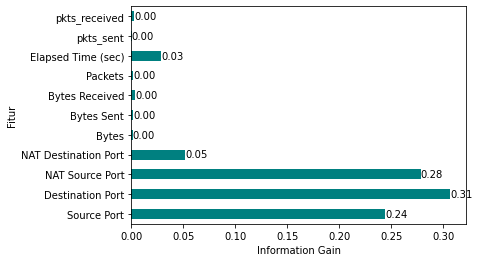

In [33]:
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline
# menghitung skor informasi bersama untuk setiap fitur dalam dataset X terhadap variabel target y.
importances = mutual_info_classif(X_ros, y_ros)
feat_importances = pd.Series(importances, balanced_data.columns[0:len(balanced_data.columns)-1])
# feat_importances = pd.Series(importances, data.columns)

feat_importances.plot(kind='barh', color ='teal')
plt.xlabel('Information Gain')
plt.ylabel('Fitur')
for i, v in enumerate(feat_importances):
    plt.text(v, i, f'{v:.2f}', color='black', va='center')
plt.show

In [34]:
# Pemisahan fitur dan target setelah oversampling
X_selected = X_ros
y_selected = y_ros

importances = mutual_info_classif(X_selected, y_selected)


In [35]:
# Membuat DataFrame untuk menampilkan informasi fitur
feat_importances = pd.DataFrame({
    'Fitur': balanced_data.columns[:-1],  # Excluding the target variable
    'Skor_Mutual_Info': importances
})

# Menambahkan kolom ranking berdasarkan skor mutual info (urutkan dari yang tertinggi)
feat_importances['Rank'] = feat_importances['Skor_Mutual_Info'].rank(ascending=False)

# Menampilkan tabel dengan nama fitur, nilai mutual info, dan ranking fitur yang diurutkan
sorted_feat_importances = feat_importances.sort_values(by='Skor_Mutual_Info', ascending=False)
print(sorted_feat_importances)

                   Fitur  Skor_Mutual_Info  Rank
1       Destination Port          0.308676   1.0
2        NAT Source Port          0.278109   2.0
0            Source Port          0.242773   3.0
3   NAT Destination Port          0.048907   4.0
8     Elapsed Time (sec)          0.030184   5.0
6         Bytes Received          0.005338   6.0
9              pkts_sent          0.002782   7.0
7                Packets          0.001533   8.0
10         pkts_received          0.001375   9.0
5             Bytes Sent          0.000086  10.0
4                  Bytes          0.000000  11.0


Setelah melakukan pemisahan fitur, kemudian melakukan split dataset dengan fungsi train_test_split yang digunakan untuk membagi dataset menjadi set pelatihan (train set) dan set pengujian (test set). Ini membantu dalam mengevaluasi kinerja model pada data yang tidak digunakan selama pelatihan.
- X_ros: Matriks fitur (features) dari dataset yang telah di-resampled dengan menggunakan Random Over-Sampling (X_ros).

- y_ros: Ini adalah vektor target (labels) yang sesuai dengan X_ros.

- test_size=0.2: Ini menentukan proporsi data yang akan dialokasikan untuk test set. Dalam hal ini, 20% dari total data akan digunakan sebagai test set.

- random_state=42: Ini digunakan untuk memastikan reproduktibilitas hasil. Jika kita memberikan nilai tertentu (dalam hal ini 42), maka setiap kali kita menjalankan fungsi ini, kita akan mendapatkan pembagian yang sama untuk set pelatihan dan set pengujian. Ini berguna ketika kita ingin hasil yang konsisten setiap kali kode dijalankan.

Hasil dari fungsi train_test_split adalah empat kumpulan data:

- X_train: Matriks fitur dari set pelatihan.
- X_test: Matriks fitur dari set pengujian.
- y_train: Vektor target dari set pelatihan.
- y_test: Vektor target dari set pengujian.

### Split Dataset

Split dataset yaitu melakukan pemisahan data menjadi dua bagian atau lebih. Split data atau pemisahan data yang dilakukan pada data ini dengan dua pemisahan, yaitu data akan digunakan untuk pelatihan dan akan digunakan untuk pengujian. 

- Data latih yaitu kumpulan data utama yang akan dimasukkan ke dalam model sehingga model tersebut dapat memplejari pola data.
- Data uji yaitu set untuk memeriksa keakuratan dari model.



Split dataset atau pemisahan dataset adalah langkah yang penting dalam analisis data. Tujuannya adalah untuk membagi dataset menjadi dua lebih subset data yang berbeda. Pembagiannya yaitu data latih (training data) dan data uji (data testing).

Tujuan utama split dataset adalah sebagai berikut :

  1. Sebagai pelatihan model untuk machine learning.

  2. Evaluasi model, data uji digunakan untuk menguji kinerja model yang telah dilatih. Hal ini membantu untuk mengukur sejauh mana model mampu melakukan prediksi dengan benar pada data yang tidak digunakan selama pelatihan.

  3. Pengukuran kinerja

  4. Pencegahan overfitting, yaitu keadaan dimana model memilliki kinerja yang sangat baik pada data latih tetapi buruk pada data uji.

Pada pengolahan data ini, sebelum dilakukan split data yaitu dengan melakukan penghapusan fitur yang memiliki nilai pengaruh terendah yang kita dapatkan pada proses seleksi fitur. Niai terendah pada seleksi fitur kita dapatkan sebesar 0.00 pada kolom fitur Elapsed Time (sec). Sehingga pada split dataset, fitur yang memiliki nilai informasi terkecil akan dihapus. 

Maka pada pengolahan code di bawah ini:
- Variabel X_selected melakukan drop penghapusan fitur yang memiliki nilai terkecil dan fitur target. 
- Variabel 'y_selected' merupakan variabel target. Variabel target('Action') ditentukan sebagai variabel 'y'.


Penjelasan dari code yang digunakan pada split dataset ini:

Pada variabel X_selected dilakukan penghapusan kolom dengan 'drop' . Kolom yang dihapus ada 6 kolom yang didapatkan nilai terkecil pada seleksi fitur dan 1 kolom 'Action' yang berupa target dalam DataFrame yang disimpan pada variabel 'balanced_data'.

Pada variabel 'y_selected' berisi kolom 'Action' dari 'balanced_Data'.  Variabel ini diasumsikan bahwa kolom 'Action' adalah kolom target atau label yang akan dilakukan prediksi.


Melakukan pengecekan jumlah data keseluruhan dan jumlah data uji dan data latih yang idgunakan pada split dataset dengan test_size 0.2 yang berarti data uji dilakukan 20% dan data latih sebesar 80% dari jumlah data. Variabel X_train yang berperan sebagai data latih berjumlah 119804 dan data yang dilakukan pengujian sebanyak 29952.

In [36]:
#Menghapus 5 kolom
X_selected = balanced_data.drop(columns=['pkts_sent', 'pkts_received','Packets', 'Bytes Received', 'Bytes Sent', 'Bytes', 'Action'])
y_selected = balanced_data['Action']

In [37]:
numerical_features = balanced_data.drop(columns=['Action'])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

In [39]:
print("Jumlah Data :", X_selected.shape[0])
print("Data Latih : ", X_train.shape[0])
print("Data Uji   : ", X_test.shape[0])

Jumlah Data : 149756
Data Latih :  119804
Data Uji   :  29952


In [40]:
print('Features',X_selected.shape)
print('Target',y_selected.shape)

Features (149756, 5)
Target (149756,)


In [41]:
# setelah seleksi fitur
y_selected = label_encoder.fit_transform(balanced_data['Action'])

Kemudian setelah dilakukan split data, dilakukan normalisasi dengan menggunakan 2 jenis normalisasi yaitu ZScore dan MinMax.

### Normalisasi

Normalisasi data adalah proses mengubah nilai-nilai dalam dataset menjadi skala tertentu agar fitur-fitur dalam dataset memiliki skala yang seragam. Tujuan digunakannya normalisasi ini adalah untuk menghindari ketidakseimbangan skala yang bisa mempengaruhi performa . Dalam normalisasi, setiap fitur dalam dataset diubah dalam rentang tertentu, misalnya antara 0 hingga 1 atau -1 hingga 1.Pada pengolahan data internet firwall ini, saya menggunakan 2 jenis normalisasi yaitu sebagai berikut :


1. MinMaxScaler

  MinMaxScaler untuk mengubah rentang data menjadi [0, 1]. Ini penting jika Anda ingin menjaga rentang nilai yang konsisten di antara semua fitur Anda, terutama jika Dengan menggunakan algoritma yang sensitive terhadap skala. Dengan menerapkan Min-Max Scaling ke data serta data pelatihan dan pengujian secara terpisah.

 Rumus MinMax :
 
 $$MinMax = \frac{X- X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} $$
 
    Keterangan : 
    - $X$ : Nilai yang akan dinormalisasi
    - $X_{\text{min}}$ : Nilai minimum dari seluruh data
    - $X_{\text{max}}$ : Nilai maksimum dari seluruh data
 
 Contoh implementasi :
 
 $X =$ [12,25,18,8,15] 
 
 Langkah-langkah yang harus diselesaikan :
 
   1.) Menentukan $X_{min}$ dan $X_{max}$
 
     $X_{min} = {8}$ , $X_{max} = 25 $
     
   2.) Menghitung $X_{normalisasi}$ untuk setiap nilai $X$ :
   
   $X_{\text{normalisasi}} = \frac{12 - 8}{25 - 8} = \frac{4}{17} \approx 0.24$
   
   $X_{\text{normalisasi}} = \frac{25 - 8}{25 - 8} = 1$
   
   $X_{\text{normalisasi}} = \frac{18 - 8}{25 - 8} = \frac{10}{17} \approx 0.59$
   
   $X_{\text{normalisasi}} = \frac{8 - 8}{25 - 8} = 0 $
  
   $X_{\text{normalisasi}} = \frac{15 - 8}{25 - 8} = \frac{7}{17}  \approx 0.41$
   
|x | x setelah normalisasi |
|---|---|
| 12 | 0.24 | 
| 25 | 1 | 
| 18 | 0.59 | 
| 8 | 0 | 
| 15 | 0.41 | 

2. ZScore

  ZSore mengubah distribusi data menjadi distribusi normal standar. Membantu dalam meningkatkan konvergensi algoritma pembelajaran mesin yang menggunakan perhitungan jarak, seperti SVM atau K-Means. Anda menerapkan Z-Score ke data dan juga untuk data pelatihan dan pengujian secara terpisah.
  
  Rumus ZScore : 
  
  $$Z =\frac{x - mean (x)}{std_{dev}}  $$

    Keterangan :
    
    - $Z =$ nilai yang akan dinormalisasi
    - mean ($x = $) rata-rata dari seluruh data
    - $std_{dev} = $ deviasi standar dari seluruh data

   Langkah-langkah perhitungan manual normalisasi Z-score adalah sebagai berikut :
   
     1.) Tentukan mean (mean(x)) 
       dengan menghitung nilai rata-rata  dari data.
      
    2.) Menghitung deviasi standar $std_{dev}$

    3.) Menghitung Z-Score untuk setiap $x$
      
    Contoh perhitungan manual normalisasi Z-Score pada sebuah dataset.
    
    $x = $ [15, 18, 20, 22, 25]
    
    Penyelesaian
    
    1.) Mean $(x)$
    
     $mean(x) = \frac{15+18+20+22+25}{5} = {100}{5} = {20}$
     
    2.) Deviasi standar $std_{dev}$
    
    $std_{dev} = \sqrt \frac{\sum_{i=1}^5(mean(x))^2}{n}$
    
    $std_{dev} = \sqrt \frac {(15-20)^2 + (18-20)^2 +(20-20)^2+(22-20)^2+(25-20)^2}{5}$
    
    $std_{dev} = \sqrt \frac {25+4+0+4+25}{5}$
    
    $std_{dev} = \sqrt \frac{58}{5}$
    
    $ = \sqrt {11}{.6}$
    
    $= {3.41}$
    
    3.) Menghitung Z-score untuk setiap $x$
    
    $Z_1 = \frac {15-20}{3.41} \approx -1.47$
    
    $Z_2 = \frac {18-20}{3.41} \approx -0.59$
    
    $Z_3 = \frac {20-20}{3.41} \approx 0$
    
    $Z_4 = \frac {22-20}{3.41} \approx 0.59$
    
    $Z_5 = \frac {25-20}{3.41} \approx 1.47$
    
    Jadi, contoh data diatas yang sudah dilakukan normalisasi Z-Score adalah :

| x | x setelah normalisasi |
|---|---|
| 15 | -1.47 | 
| 18 | -0.59 | 
| 20 | 0 | 
| 22 | 0.59 | 
| 25 | 1.47 | 


- Pada normalisasi, melakukan perhitungan rata-rata dan standar deviasi di setiap fitur pada X_train dengan menggunakan **fit**
  
- **transform**,  mengaplikasikan normalisasi berdasarkan jenis normalisasinya ke setiap nilai dalam set pelatihan menggunakan rata-rata dan standar deviasi yang dihitung sebelumnya.

- Transform pada data pengujian(X_test) dengan transform(X_test) menggunakan rata-rata dan standar deviasi yang dihitung pada X_train untuk melakukan normalisasi pada set pengujian.

In [42]:
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train)
X_test_standard = scaler.transform(X_test)

In [43]:
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

In [44]:
print("Data Latih Z Score : ", X_train_standard.shape[0])
print("Data Uji Z Score  : ", X_test_standard.shape[0])
print("=============================================")
print("Data Latih MinMax : ", X_train_minmax.shape[0])
print("Data Uji MinMax  : ", X_test_minmax.shape[0])

Data Latih Z Score :  119804
Data Uji Z Score  :  29952
Data Latih MinMax :  119804
Data Uji MinMax  :  29952


**Menyimpan model normalisasi**

Menyimpan model normalisasi MinMax dan Zscore menjadi file pikle yang akan kita gunakan untuk melakukan deployment setelah evaluasi model.Format pickle menjadi suatu cara untuk menyimpan model yang telah dilatih ke dalam file biner, termasuk model machine learning yang dapat diambil kembali. Dengan menyimpan file pickle, model yang telah k=dilatih dapat digunakan kembali untuk prediksi di lingkungan produksi tanpa harus melatih ulang. 

In [45]:
file_zscore = 'norma_zs.pkl'
with open(file_zscore, 'wb') as file:
  pickle.dump(scaler, file)

file_minmax = 'normal_min.pkl'
with open(file_minmax, 'wb') as file:
  pickle.dump(minmax_scaler, file)

In [ ]:
file_zscore = 'normalized_ZScore_2.pkl'
with open(file_zscore, 'wb') as file:
  pickle.dump(scaler, file)

file_minmax = 'normalized_minmax_2.pkl'
with open(file_minmax, 'wb') as file:
  pickle.dump(minmax_scaler, file)

In [ ]:
file_zscore = 'normalized_ZScore.pkl'
with open(file_zscore, 'wb') as file:
  pickle.dump(scaler, file)

file_minmax = 'normalized_minmax.pkl'
with open(file_minmax, 'wb') as file:
  pickle.dump(minmax_scaler, file)

## 4. Modelling

Machine learning model merupakan program komputer yang digunakan untuk mengenali pola dalam data maupun melakukan pembuatan sebuah prediksi. Modelling menggunakan algoritma machine learning dengan beberapa model. Kemudian, hasil yang terbaik atau memiliki performa paling tinggi dari sebuah model akan disimpan ke dalam file pickle (pkl). Pemilihan model harus sesuai dengan tipe permasalahan pada data (klasifikasi, regresi, klastering, dll), dataframe ini adalah masalah klasifikasi. Sehingga, dilakukan pengolahan dengan model klasifikasi. Pada pengolahan data firewall ini menggunakan 5 model metode yang idgunakan untuk mengklasifikasikan yaitu Random Forest, decission Tree, Logistic Regresion, SVM, dan Naive Bayes. Dari kelima metode tersebut didapatkan hasil terbaik dengan menggunakan metode Random Forest dengan hasil 99,94%.

### Random Forest

Random Forest adalah kumpulan pohon keputusan yang dibangun secara acak dan kemudian digabungkan untuk meningkatkan kinerja dan ketahanan terhadap overfitting. Dengan menggunakan Random Forest, kita dapat memanfaatkan keberagaman pohon keputusan yang dibangun secara acak untuk meningkatkan kinerja model dan mengurangi risiko overfitting. Algoritma ini cocok untuk berbagai masalah klasifikasi dan regresi dalam jumlah yang besar. Terdapat dua hal yang membuat algoritma ini disebut random, yaitu :
1. Setiap pohon tumbuh pada sampel bootstrap yang berbeda diambil dari data latih secara acak.
2. Dalam setiap *node split* selama pembentukan *decission tree*, sebagai sampel dari m variabel dipilih dari kumpulan data yang asli dan kemudian yang terbaik akan digunakan dalam node tersebut

Hasil prediksi dari *Random Forest* didapatkan mellaui hasil terbanyak dari setiap  tree yang terbentuk.

Rumus Random Forest

Indeks Gini digunakan ntuk memutuskan bagaimanaa node pada pohon keputusan bercabang $$ Gini = 1 - \sum_{i=1}^C (P_i)^2$$

$P_i$ adalah proporsi dari kelas i dalam node.Gini Index membantu Random Forest memilih fitur-fitur yang efektif untuk memisahkan data pada setiap langkah pembentukan pohon keputusan.


Entropy
$$Entropy = - \sum_{i=1}^k(p_i). log_2(p_i)$$

Berikut adalah langkah-langkah teoritis untuk penggunaan Random Forest:

   1. Inisialisasi Model
        Model Random Forest diinisialisasi dengan memilih jumlah pohon keputusan (n_estimators) dan kriteria pemisahan node pada setiap pohon (criterion). Pembuatan model berdasarkan berapa banyaknya proses normalisasi yang telah dilakukan dan diinginkan untuk diketahui hasilnya. Pada pengolahan data ini dengan menggunakan 2 normalisasi, sehingga dua model Random Forest diinisialisasi dengan menggunakan Z-Score (rf_model_zscore) dan MinMax (rf_model_minmax).
    
   2. Pelatihan Model
    - Setiap pohon keputusan dilatih dengan menggunakan bootstrap (pengambilan sampel dengan pengembalian) dari data pelatihan.
    - Setiap pohon keputusan memilih subspace acak dari seluruh fitur yang tersedia.
    - Hasil dari setiap pohon keputusan diimbangi bersama untuk menghasilkan model ensemble.
    
   3. Prediksi
       Setelah model dilatih, digunakan untuk melakukan prediksi pada data pengujian. Setiap pohon keputusan memberikan prediksi, dan hasil akhir adalah hasil mayoritas dari semua prediksi tersebut. Prediksi dilakukan menggunakan metode .predict.
    
   4. Perhitungan Akurasi
       Akurasi model Random Forest dihitung dengan membandingkan prediksi dengan label sebenarnya pada data pengujian. Akurasi model biasanya dihitung menggunakan fungsi accuracy_score dari sklearn. Hasil akurasi dari kedua model dapat dicetak atau disimpan untuk perbandingan
    
Contoh perhitungan manual dengan Gini Index dan Entropy pada suatu node. Data node :
    
    Kelas A : 10 data
    Kelas B : 5 data 
    Kelas C : 5 data 
Perhitungan Gini Index :
$ Gini = 1 - \sum_{i=1}^C (P_i)^2 \\$
$ Gini = 1 - (p_A)^2 - (p_B)^2 - (p_C)^2 $

$ Gini = 1 - {10}{20}^2 - {5}{20}^2 - {5}{20}^2$

$ Gini = 1 - {100}{400} - {25}{400} - {25}{400}$

$ Gini = 1 - {150}{400}$

$ Gini \approx 0.625 $

Perhitungan Entropy :

$Entropy = - \sum_{i=1}^k(p_i). log_2(p_i)$

$Entropy = - p_A.log_2(p_A) - p_B.log_2(p_B) - p_C.log_2(p_C) $

$Entropy = - (\frac{10}{20}.log_2(\frac{10}{20})) -(\frac{5}{20}.log_2(\frac{5}{20}))-(\frac{5}{20}.log_2(\frac{5}{20})))$


$Entropy = -(\frac{10}{20}.(-1))-(\frac{5}{20}.(-2))-(\frac{5}{20}.(-2))$

$Entropy = 0.5 +0.5 +0.5$

$Entropy = 1.5 $

Jadi, pada contoh perhitungan manual ini didapatkan nilai Gini Index sekitar 0.625 dan Entropy 1.5 untuk node tersebut.

In [ ]:

# Inisialisasi list untuk menyimpan akurasi
accuracies_rf = []
best_accuracy_rf = 0
best_preprocessing = None
best_estimators = 0

# Random Forest dengan Z-Score
rf_model_zscore = RandomForestClassifier()
rf_model_zscore.fit(X_train_standard, y_train)
rf_pred_zscore = rf_model_zscore.predict(X_test_standard)
accuracy_zscore = accuracy_score(y_test, rf_pred_zscore)
accuracies_rf.append(('Z-Score', accuracy_zscore))

# Random Forest dengan MinMax
rf_model_minmax = RandomForestClassifier()
rf_model_minmax.fit(X_train_minmax, y_train)
rf_pred_minmax = rf_model_minmax.predict(X_test_minmax)
accuracy_minmax = accuracy_score(y_test, rf_pred_minmax)
accuracies_rf.append(('MinMax', accuracy_minmax))

# Tampilkan akurasi Random Forest
for preprocessing, accuracy in accuracies_rf:
    print(f"Akurasi Random Forest ({preprocessing}): {accuracy * 100:.2f}%")

# Pilih jenis preprocessing dengan akurasi tertinggi
if accuracy_zscore > accuracy_minmax:
    best_accuracy_rf = accuracy_zscore
    best_preprocessing = 'Z-Score'
    best_rf_model = rf_model_zscore
else:
    best_accuracy_rf = accuracy_minmax
    best_preprocessing = 'MinMax'
    best_rf_model = rf_model_minmax

# Tampilkan akurasi terbaik
print(f"\nAkurasi Terbaik (Preprocessing={best_preprocessing}): {best_accuracy_rf * 100:.2f}%")


In [46]:
# Inisialisasi list untuk menyimpan akurasi
accuracies_rf_zscore = []
accuracies_rf_minmax = []

best_accuracy_rf_zscore = 0
best_accuracy_rf_minmax = 0
best_preprocessing_zscore = None
best_preprocessing_minmax = None
best_n_estimators_zscore = 0
best_n_estimators_minmax = 0
best_rf_model_zscore = None  # Inisialisasi model terbaik untuk Z-Score
best_rf_model_minmax = None  # Inisialisasi model terbaik untuk MinMax

# Loop untuk menguji estimator dari 1 sampai 100
for n_estimators in range(1, 101):
    # Random Forest dengan n_estimators dan Z-Score
    rf_model_zscore = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_model_zscore.fit(X_train_standard, y_train)
    rf_pred_zscore = rf_model_zscore.predict(X_test_standard)
    accuracy_zscore = accuracy_score(y_test, rf_pred_zscore)

    accuracies_rf_zscore.append((f'Z-Score (n_estimators={n_estimators})', accuracy_zscore))

    # Memilih model dengan akurasi tertinggi untuk Z-Score
    if accuracy_zscore > best_accuracy_rf_zscore:
        best_accuracy_rf_zscore = accuracy_zscore
        best_preprocessing_zscore = f'Z-Score'
        best_n_estimators_zscore = n_estimators
        best_rf_model_zscore = rf_model_zscore

    # Random Forest dengan n_estimators dan MinMax
    rf_model_minmax = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_model_minmax.fit(X_train_minmax, y_train)
    rf_pred_minmax = rf_model_minmax.predict(X_test_minmax)
    accuracy_minmax = accuracy_score(y_test, rf_pred_minmax)

    accuracies_rf_minmax.append((f'MinMax (n_estimators={n_estimators})', accuracy_minmax))

    # Memilih model dengan akurasi tertinggi untuk MinMax
    if accuracy_minmax > best_accuracy_rf_minmax:
        best_accuracy_rf_minmax = accuracy_minmax
        best_preprocessing_minmax = f'MinMax'
        best_n_estimators_minmax = n_estimators
        best_rf_model_minmax = rf_model_minmax

# Memilih model terbaik dari Z-Score dan MinMax
if best_accuracy_rf_zscore > best_accuracy_rf_minmax:
    best_accuracy_rf = best_accuracy_rf_zscore
    best_rf_model = best_rf_model_zscore
    best_preprocessing = best_preprocessing_zscore
    best_n_estimators = best_n_estimators_zscore
else:
    best_accuracy_rf = best_accuracy_rf_zscore
    best_rf_model = best_rf_model_minmax
    best_preprocessing = best_preprocessing_minmax
    best_n_estimators = best_n_estimators_minmax
# Tampilkan akurasi Random Forest untuk Z-Score
print("Akurasi untuk Z-Score:")
for preprocessing, accuracy in accuracies_rf_zscore:
    print(f"{preprocessing}: {accuracy * 100:.2f}%")

# Tampilkan akurasi terbaik untuk Z-Score
print(f"\nAkurasi Terbaik (Preprocessing={best_preprocessing_zscore}): {best_accuracy_rf_zscore * 100:.2f}% dengan n_estimators={best_n_estimators_zscore}")

# Tampilkan akurasi Random Forest untuk MinMax
print("\nAkurasi untuk MinMax:")
for preprocessing, accuracy in accuracies_rf_minmax:
    print(f"{preprocessing}: {accuracy * 100:.2f}%")

# Tampilkan akurasi terbaik untuk MinMax
print(f"\nAkurasi Terbaik (Preprocessing={best_preprocessing_minmax}): {best_accuracy_rf_minmax * 100:.2f}% dengan n_estimators={best_n_estimators_minmax}")
    
# Tampilkan akurasi terbaik
print(f"\nAkurasi Terbaik (Preprocessing={best_preprocessing}): {best_accuracy_rf * 100:.2f}% dengan n_estimators={best_n_estimators}")

# Tampilkan model terbaik
print(f"\nModel Terbaik: {best_rf_model}")


Akurasi untuk Z-Score:
Z-Score (n_estimators=1): 99.89%
Z-Score (n_estimators=2): 99.90%
Z-Score (n_estimators=3): 99.92%
Z-Score (n_estimators=4): 99.94%
Z-Score (n_estimators=5): 99.93%
Z-Score (n_estimators=6): 99.93%
Z-Score (n_estimators=7): 99.94%
Z-Score (n_estimators=8): 99.94%
Z-Score (n_estimators=9): 99.93%
Z-Score (n_estimators=10): 99.93%
Z-Score (n_estimators=11): 99.94%
Z-Score (n_estimators=12): 99.94%
Z-Score (n_estimators=13): 99.94%
Z-Score (n_estimators=14): 99.94%
Z-Score (n_estimators=15): 99.94%
Z-Score (n_estimators=16): 99.94%
Z-Score (n_estimators=17): 99.94%
Z-Score (n_estimators=18): 99.94%
Z-Score (n_estimators=19): 99.94%
Z-Score (n_estimators=20): 99.94%
Z-Score (n_estimators=21): 99.94%
Z-Score (n_estimators=22): 99.93%
Z-Score (n_estimators=23): 99.93%
Z-Score (n_estimators=24): 99.93%
Z-Score (n_estimators=25): 99.93%
Z-Score (n_estimators=26): 99.94%
Z-Score (n_estimators=27): 99.94%
Z-Score (n_estimators=28): 99.93%
Z-Score (n_estimators=29): 99.94%


In [ ]:
import pickle
model_filename = 'best_random_forest_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_rf_model, file)

Terdapat kelas yag tidak muncul dalam prediksi. Hal ini bisa disebabkan karena ketidakseimbangan kelas dalam data uji. Sehingga, model ini sulit untuk melakukan prediksi kelas yang memiliki representasi yang kecil dalam data pelatihan.

### Decision Tree

Decission Tree merupakan model pembelajaran mesin yang memodelkan keputusan dan hubungan menggunakan pohon keputusan atau struktur pohon. Algoritma ini memecah data menjadi bagian-bagian yang lebih kecil dan mengambil keputusan di setiap simpul (node) pohon.
Rumus Decision Tree untuk menyeleesaikan klasifikasi :

1. Gini Index untuk Node

$Gini = 1 - \sum_{i=1}^k(p_i)^2$

nilai $p_i$ adalah proporsi dari kelas 1 ddalam node tersebut.

2. Gini Index untuk Pemisahan(Split)

$Gini_{split} = \sum_{j=1}^m \frac{n_j}{N} . Gini_j$

Keterangan :

$n_j$ = jumlah data dalam subset j

$N$ = total jumlah data

$Gini_j$ = Gini Index untuk node subset j

3. Information Gain : 

$Information Gain = Gini_{parent} - Gini{split}$

Keterangan :

$Gini_{parent}$ = Gini Index untuk node sebelum pemisahan.

Perhitungan manual :

Kelas A : 20 data
Kelas B : 15 data
Kelas C : 15 data

$Gini_{parent} =  1 - (\frac{20}{50})^2 - (\frac{15}{50})^2-(\frac{15}{50})^2  $

$Gini_{parent} \approx 0.64$

Pemisahan(split) dengan fitur X :

 - subset 1 (X $ \leq $ 5 ) : kelas A:10, Kelas B:5, Kelas C:0
 - subset 2 (X > 5): kelas A:10, Kelas B:10, Kelas C : 15
    
$Gini_1 = 1- (\frac{10}{15})^2 - (\frac{5}{15})^2$

$Gini_1 \approx 0.44$

$Gini_2 = 1- (\frac{10}{35})^2 - (\frac{10}{35})^2 - (\frac{15}{35})^2$

$Gini_2 \approx 0.65$

$Gini_{split} = \frac{15}{50}. \ 0.44 + \frac{35}{50}.\ 0.65$

$Gini_{split} \approx 0.57 $

$Information Gain = 0.64 - 0.57$

$Information Gain \approx 0.07$

Proses perhitungan ini diulang pada setiap fitur dan nilai ambang untuk memilih pemisahan terbaik yang memberikan Information Gain maksimal.

Cara Kerja Decision Tree :

  1. Pembentukan pohon keputusan
  
      Decision Tree membangun pohon keputusan berdasarkan pemilihan fitur yang paling informatif pada setiap langkahnya.Fitur yang paling informatif diidentifikasi berdasarkan kriteria seperti Gini impurity, Information Gain, atau Gain Ratio.
  2. Pemilihan fitur terbaik
  
      Decision Tree memilih fitur yang paling baik memisahkan dataset berdasarkan kelas target. Hal ini dilakukan untuk meningkatkan informasi.
  
  3. Pembentukan cabang dan daun
  
      Pohon dibentuk dengan mengulangi langkah pemilihan fitur setiap cabang sampai mencapai daun yang mewakili kelas atau nilai prediksi. 
  4. Keputusan berbasis pohon
  
      Ketika ada data baru, Decision Tree mengambil keputusan berdasarkan jalur yang dilalui dalam pohon dari akar ke daun.
  5. Pemangkasan(pruning)
  
      Teknik pemangkasan dapat diterapkan untuk mencegah overfitting dengan menghapus beberapa bagian dari pohon keputusan. Pemangkasan ini dilakukan untk memastikan bahwa  pohon tidak teralu kompleks dengan spesifik sehingga kinerjanya menurun pada data yang  tidak terlihat sebelumnya. 
  6. Prediksi
      
      Setelah pohon dibentuk, model dapat digunakan untuk melakukan prediksi terhadap data baru dengan melewati pohon berdasarkan fitur-fitur yang dimiliki oleh data tersebut.

Langkah-langkah :

   1. Inisialisasi Model
   
        Karena dalam Decision Tree memiliki banyak parameter, tetapi yang utama adalah criterion (kriteria pemisahan node, misalnya 'gini' atau 'entropy'). Pembuatan model berrdasarkan berapa banyaknya proses normalisasi yang telah dilakukan dan diinginkan untuk diketahui hasilnya. Pada pengolahan data ini dengan mengggunakan 2 normalisasi, sehingga dua model Decision Tree diinisialisasi dengan menggunakan Z-Score (dt_model_zscore) dan MinMax (dt_model_minmax).
        
   2. Pelatihan Model pada dataset pengujian
   
       Model Decission Tree dilatih dengan data pelatihan menggunakan metode .fit . 
   3. Prediksi pada dataset pengujian
   
        Setelah model dilatih, digunakan untuk melakukan prediksi pada data pengujian. Prediksi dilakukan menggunakan metode .predict. 
   4. Pengukuran Akurasi
   
        Akurasi model Decision Tree dihitung menggunakan fungsi accuracy_score dari sklearn. 

In [49]:
# Inisialisasi list untuk menyimpan akurasi
accuracies_dt = []
best_accuracy_dt = 0
best_preprocessing = None

# Decision Tree dengan Z-Score
dt_model_zscore = DecisionTreeClassifier()
dt_model_zscore.fit(X_train_standard, y_train)
# model Decision Tree digunakan untuk membuat prediksi berdasarkan jalur yang dilalui dalam pohon dari akar ke daun
dt_pred_zscore = dt_model_zscore.predict(X_test_standard)
accuracy_zscore = accuracy_score(y_test, dt_pred_zscore)
accuracies_dt.append(('Z-Score', accuracy_zscore))

# Decision Tree dengan MinMax
dt_model_minmax = DecisionTreeClassifier()
# Prediksi pada dattaset pengujian
dt_model_minmax.fit(X_train_minmax, y_train)
# model Decision Tree digunakan untuk membuat prediksi berdasarkan jalur yang dilalui dalam pohon dari akar ke daun
dt_pred_minmax = dt_model_minmax.predict(X_test_minmax)
# Pengukuran akurasi
accuracy_minmax = accuracy_score(y_test, dt_pred_minmax)
# Menyimpan akurasi dalam list
accuracies_dt.append(('MinMax', accuracy_minmax))

# Menampilkan akurasi Decision Tree
for preprocessing, accuracy in accuracies_dt:
    print(f"Akurasi Decision Tree ({preprocessing}): {accuracy * 100:.2f}%")

# pemilihan jenis preprocessing dengan akurasi tertinggi
if accuracy_zscore > accuracy_minmax:
    best_accuracy_dt = accuracy_zscore
    best_preprocessing = 'Z-Score'
    best_dt_model = dt_model_zscore
else:
    best_accuracy_dt = accuracy_minmax
    best_preprocessing = 'MinMax'
    best_dt_model = dt_model_minmax

# Menampilkan akurasi terbaik
print(f"\nAkurasi Terbaik (Preprocessing={best_preprocessing}): {best_accuracy_dt * 100:.2f}%")


Akurasi Decision Tree (Z-Score): 99.94%
Akurasi Decision Tree (MinMax): 99.94%

Akurasi Terbaik (Preprocessing=MinMax): 99.94%


In [ ]:
import pickle
model_filename = 'best_dt.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_dt_model, file)

### Logistic Regression

Logistic Regression adalah algoritma klasifikasi yang digunakan untuk memodelkan probabilitas bahwa suatu instance/data point akan termasuk ke dalam kelas tertentu.Algoritma ini menggunakan fungsi logistik (sigmoid) untuk menghasilkan output antara 0 dan 1, yang diinterpretasikan sebagai probabilitas.
Untuk mencari nilai logistic regression, dilakukan beberapa tahapan sebagai berikut :

Rumus :

$P(Y=1) = \frac{1}{1+e ^ -(b_0+b_1.X_1+b_2.X_2+...+b_n.X_n)}$

Keterangan :

- $P(Y=1)$ adalah probabilitas bahwa variabel dependen
- $Y$ sama dengan 1 (kelas positif).
- $e$ adalah bilangan Euler (sekitar 2.71828).
- $b_0$ adalah intercept (konstanta) dari model.
- $b_1, b_2, \ldots, b_n$ adalah koefisien dari masing-masing fitur $X_1, X_2, \ldots, X_n$.
- $X_1, X_2, \ldots, X_n$ adalah variabel-variabel independen atau fitur-fitur yang digunakan dalam model.

In [50]:
from sklearn.linear_model import LogisticRegression

akurasi=[]
lr_model = LogisticRegression()
lr_model.fit(X_train_standard, y_train)
lr_pred = lr_model.predict(X_test_standard)
lr_accuracy = accuracy_score(y_test, lr_pred)
akurasi.append(('Z-Score',lr_accuracy))

lr_model.fit(X_train_minmax, y_train)
lr_pred2 = lr_model.predict(X_test_minmax)
lr_accuracy2 = accuracy_score(y_test, lr_pred2)
akurasi.append(('MinMax',lr_accuracy2))
for preprocessing, accuracy in akurasi:
    print(f"Akurasi Logistic Regression ({preprocessing}): {accuracy * 100:.2f}%")

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Akurasi Logistic Regression (Z-Score): 81.99%
Akurasi Logistic Regression (MinMax): 77.94%


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### SVM

SVM adalah algoritma pembelajaran mesin yang digunakan untuk tugas klasifikasi dan regresi. SVM bertujuan untuk menemukan hyperplane terbaik yang memisahkan dua kelas dengan margin terbesar. Hyperplane ini adalah garis atau permukaan yang memaksimalkan jarak antara kelas-kelas tersebut.

Rumus SVM : 

$w⋅x+b=0$

Keterangan:
- $w$ : weights atau vektor bobot yang memiliki panjang yang sama dengan vektor fitur $x$. Setiap elemen vektor $w$ mengukur pengaruh relatif dari masing-masing fitur terhadap keputusan.

- $x$ : vektor input yang merupakan data yang akan diklasifikasi

- $b$ : bias yaitu parameter yang memungkinkan penyesuaian posisi hyperplane tanpa mengubah arahnya.

- $\cdot$ : operasi dot product(hasil kali titik) antara vektor $w$ dan $x$.

Cara Kerja SVM :
1. Pemilihan hyperplane
    
    SVM mencari hyperplane yang memaksimalkan margin antara kelas.Margin dihitung sebagai jarak antara hyperplane dan titik terdekat dari setiap kelas.
    
2. Penanganan data yang tidak terpisah linear 

    Untuk kasus di mana data tidak dapat dipisahkan secara linear, SVM menggunakan teknik kernel untuk mentransformasi data ke dimensi yang lebih tinggi sehingga menjadi dapat dipisahkan.
    
3. Penentuan vektor dukungan (Support Vector) 
    
    Support vectors adalah sampel data yang berada di sekitar margin atau di sisi yang salah dari hyperplane.
4. Penentuan bobot dan bias

    SVM mencari bobot (w) dan bias (b) yang memenuhi kendala dan meminimalkan fungsi tujuan.
5. Keputusan klasifikasi

    Setelah melatih model, SVM dapat digunakan untuk klasifikasi data baru berdasarkan fungsi keputusan $(f(x))$


In [52]:
# SVM dengan Zscore
svm_model_zscore = SVC()
svm_model_zscore.fit(X_train_standard, y_train)
svm_pred_zscore = svm_model_zscore.predict(X_test_standard)
accuracy_svm_zscore = accuracy_score(y_test, svm_pred_zscore)

# SVM dengan MinMax
svm_model_minmax = SVC()
svm_model_minmax.fit(X_train_minmax, y_train)
svm_pred_minmax = svm_model_minmax.predict(X_test_minmax)
accuracy_svm_minmax = accuracy_score(y_test, svm_pred_minmax)

# Tampilkan akurasi SVM
print(f"Akurasi SVM dengan Z-Score: {accuracy_svm_zscore * 100:.2f}%")
print(f"Akurasi SVM dengan MinMax: {accuracy_svm_minmax * 100:.2f}%")

Akurasi SVM dengan Z-Score: 85.26%
Akurasi SVM dengan MinMax: 84.39%


### Naive Bayes
Naive Bayes adalah algoritma klasifikasi probabilistik yang berdasarkan teorema Bayes dengan asumsi bahwa fitur-fitur yang digunakan untuk menggambarkan instance adalah independen satu sama lain. Naive Bayes mengasumsikan bahwa keberadaan suatu fitur dalam suatu kelas tidak terkait dengan keberadaan fitur lainnya.

Rumus dasar teorema bayes :

$P(y|X) = \frac{(P(y|X).P(y)}{P(X)}$

Langkah-langkah :

   1. Inisialisasi model 
   
        Tiga jenis utama Naive Bayes adalah:
        
        1.) Gaussian Naive Bayes: Cocok untuk data yang terdistribusi normal.
        
        2.) Multinomial Naive Bayes: Cocok untuk data yang terdistribusi multinomial, seperti teks.
        
        3.) Bernoulli Naive Bayes: Cocok untuk data biner (0 atau 1).
        
       Jika pada pengolahan data terdapat 2 normalisasi, maka ketike melakukan inisialisasi model juga melakukan 2 kali dengan menggunakan fungsi distribusi gaussian.

   2. Pelatihan model
   
   - Menghitung probabilitas prior untuk setiap kelas dan probabilitas kondisional untuk setiap fitur yang diberikan kelas.
   - Karena dalam data ini menggunakan 2 normalisasi, sehingga untuk melakukan perhitungan akurasi dengan model naive bayes juga diperlukan 2 data pelatihan yang berbeda. 
    - Data pelatihan (X_train_standard, y_train) digunakan untuk melatih model Naive Bayes dengan Z-Score.
    - Data pelatihan (X_train_minmax, y_train) digunakan untuk melatih model Naive Bayes dengan MinMax.
    
   3. Prediksi
       Untuk mendapatkan nilai prediksi, menggunakan kembali model yang telah dilatih untuk memprediksi kelas baru berdasarkan nilai fitur yang diberikan.
        Model yang telah dilatih, digunakan untuk membuat prediksi pada data pengujian. Kemudian dalam melakukan prediksi menggunakan fungsi .predic pada pengujian X_test_standard dan X_test minmmax.
    
   4. Perhitungan akurasi
       Menghitung akurasi dari prediksi Naive Bayes dengan Z-Score dan MinMax.
        Akurasi diukur menggunakan fungsi 'accuracy_score' dari sklearn.
    


In [51]:
# Naive Bayes dengan Z-Score
nb_model_zscore = GaussianNB()
nb_model_zscore.fit(X_train_standard, y_train)
nb_pred_zscore = nb_model_zscore.predict(X_test_standard)
accuracy_nb_zscore = accuracy_score(y_test, nb_pred_zscore)

# Naive Bayes dengan MinMax
nb_model_minmax = GaussianNB()
nb_model_minmax.fit(X_train_minmax, y_train)
nb_pred_minmax = nb_model_minmax.predict(X_test_minmax)
accuracy_nb_minmax = accuracy_score(y_test, nb_pred_minmax)

# Tampilkan akurasi Naive Bayes
print(f"Akurasi Naive Bayes dengan Z-Score: {accuracy_nb_zscore * 100:.2f}%")
print(f"Akurasi Naive Bayes dengan MinMax: {accuracy_nb_minmax * 100:.2f}%")


Akurasi Naive Bayes dengan Z-Score: 79.34%
Akurasi Naive Bayes dengan MinMax: 79.34%


### Mendapatkan Model Terbaik

Setelah melakukan permodelan , untuk mendapatkan model yang terbaik untuk pengolahan data ini.

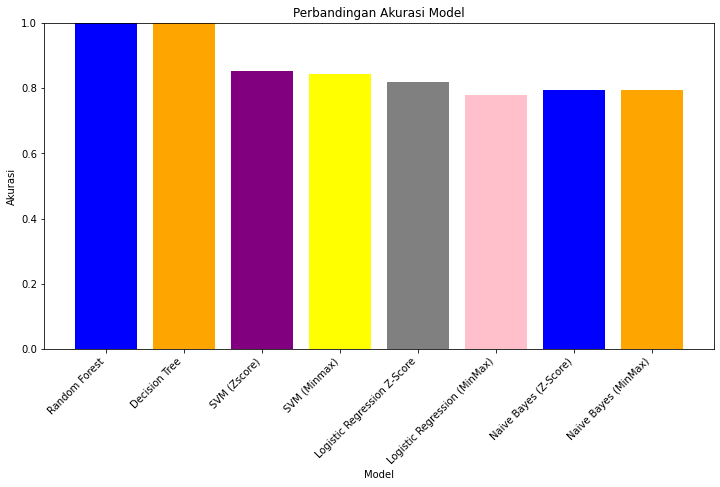

In [56]:
import matplotlib.pyplot as plt

# List untuk menyimpan hasil akurasi
models = [
          'Random Forest',
          'Decision Tree',
          'SVM (Zscore)',
          'SVM (Minmax)',
          'Logistic Regression Z-Score',
          'Logistic Regression (MinMax)',
          'Naive Bayes (Z-Score)',
          'Naive Bayes (MinMax)']
accuracies = [
              best_accuracy_rf,
              best_accuracy_dt,
              accuracy_svm_zscore,
              accuracy_svm_minmax,
              lr_accuracy,
              lr_accuracy2,
              accuracy_nb_zscore,
              accuracy_nb_minmax]
# accuracies = [lr_accuracy, lr_accuracy2, accuracy_svm_zscore, accuracy_svm_minmax, best_accuracy_rf, best_accuracy_dt, accuracy_nb_zscore, accuracy_nb_minmax]

# Membuat grafik batang
plt.figure(figsize=(12, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'purple', 'yellow', 'grey', 'pink'])
plt.ylim(0, 1)  # Sesuaikan dengan rentang akurasi (0-1)
plt.title('Perbandingan Akurasi Model')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.xticks(rotation=45, ha='right')  # Rotasi label x-axis agar lebih mudah dibaca
plt.show()


## 4. Evaluasi Model
Evaluasi model  dilakukan untuk mengukur seberapa baik model dapat melakukan prediksi atau klasifikasi. Evaluasi untuk mengukur performa model pada klasifikasi meliputi akurasi, F_1 Score, Precission, dan Recall. Evaluasi model bisa ditampilkan melalui tabel confussion matrix untuk mengukur kinerja metode permodelan tersebut dalam mengetahui seberapa banyak model mampu melakukan prediksi dengan benar dan salah pada total keseluruhan dataset. 

Salah satu cara untuk menyajikan evaluasi model secara menyeluruh adalah dengan Confussion Matrix. Dalam konteks Confusion Matrix, dengan mengidentifikasi True Positive (TP), True Negative (TN), False Positive (FP), dan False Negative (FN) berdasarkan posisi elemen-elemen dalam matriks.Elemen-elemen dalam matriks ini memberikan gambaran tentang seberapa baik model dapat mengenali kelas positif dan negatif, serta seberapa sering model memberikan prediksi yang benar atau salah.


$$
\begin{bmatrix}
TN \ \ \ FP\\
FN \ \ \ TP
\end{bmatrix}
$$


Berikut adalah definisi dari setiap elemen:

- True Positive (TP): Jumlah sampel positif yang diprediksi dengan benar.
- True Negative (TN): Jumlah sampel negatif yang diprediksi dengan benar.
- False Positive (FP): Jumlah sampel negatif yang salah diprediksi sebagai positif.
- False Negative (FN): Jumlah sampel positif yang salah diprediksi sebagai negatif.


### 1. Akurasi (Accuracy)

$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$

Akurasi adalah rasio prediksi benar (positif dan negatif) atau True Positif dan True Negative dibandingkan dengan total data.
### 2. Precission

$Precision = \frac{TP}{TP+FP}$

Presisi mendefinisikan rasio dari data bernilai  positif benar (True Positive)  terhadap jumlah positif benar(True Positive) dan positif salah (False Positive)

### 3. Recall

$Recall = \frac{TP}{TP+FN}$

Recall merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar-benar positif.

### 4. Support

$Support = TP+FN$

Support adalah jumlah aktual data yang termasuk dalam setiap kelas. Semakin tinggi nilai Support, semakin banyak sampel aktual yang termasuk dalam kelas tersebut.

### 5. F1- Score

$F1-Score = \frac{2.TP}{2.TP+FP+FN}$

F1 adalah perbandingan rata-rata precsision dan recall

### Classification Report

Mencetak Classification Report ke layar, yang berisi informasi tentang precision, recall, F1-score, dan metrik-metrik evaluasi lainnya untuk setiap kelas yang ada dalam data.

**1. Random Forest**

In [47]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

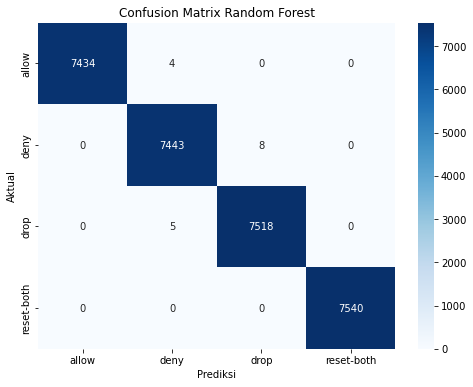

In [49]:
# Prediksi menggunakan model terbaik
best_rf_pred = best_rf_model.predict(X_test_minmax)  # Gunakan salah satu skala,  Z-Score

# Matriks Konfusi
conf_matrix = confusion_matrix(y_test, best_rf_pred)

# Visualisasi dengan Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()


In [58]:
# Matriks Konfusi
conf_matrix = confusion_matrix(y_test, best_rf_pred)

# Mendapatkan nilai TN, FN, dan FP

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)
print("True Positive (TP):", TP)

True Negative (TN): 7434
False Positive (FP): 4
False Negative (FN): 0
True Positive (TP): 7443


In [59]:
# Prediksi dengan model terbaik
best_rf_pred = best_rf_model.predict(X_test)

# Evaluasi dengan precision, recall, dan F1-score
classification_rep = classification_report(y_test, best_rf_pred)
print("Classification Report:")
print(classification_rep)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

       allow       0.88      0.99      0.93      7438
        deny       0.35      1.00      0.51      7451
        drop       0.00      0.00      0.00      7523
  reset-both       0.00      0.00      0.00      7540

    accuracy                           0.50     29952
   macro avg       0.31      0.50      0.36     29952
weighted avg       0.30      0.50      0.36     29952



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Deployment

Pada tahap deployment, menggunakan streamlit dengan file yang berekstensi **.py** . File yang dilakukan pengolahan yaitu sebagai berikut :
- model normalisasi ZSCore yang disimpan dalam file pickle
- model normalisasi MinMax yang disimpan dalam file pickle
- model dengan algoritma terbaik pada pengolahan data ini yaitu Decission Tree